In [179]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
import prepare 
import acquire
import re
from time import sleep
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

In [180]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()


# Exploration

- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team
- dragaon team effects the outcome of the game

Bivariate Study

- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

Multivariate Study

-  blue team takes dragons and blue team assists effects the outcome of the game
- blue wards and blue towers taken effects the outcome of the game
- blue damage is more important then red damage will efect the outcome
- Red towers lost and total red team damage will effect the outcome of a red team win


In [181]:
df = pd.read_csv('final_10.csv')

df

,Unnamed: 0,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_0,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,876.0,1331.0,556.0,629.0,437.0,400.0,625.0,102.0,1331.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1752,1637449991725,4110664149,CLASSIC,teambuilder-match-4110664149,1637448239216,MATCHED_GAME,11.23.409.111,0.0,30.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [182]:
df = prepare.clean(df)

In [111]:
df = df.drop(columns=['gameMode', 'gameType','gameVersion','matchId','gameName'])

In [183]:
def split(df):
    
    train, test = train_test_split(df, test_size = 0.2, random_state = 123)

    return train, test


In [184]:
train, test = split(df)

# Univariate 

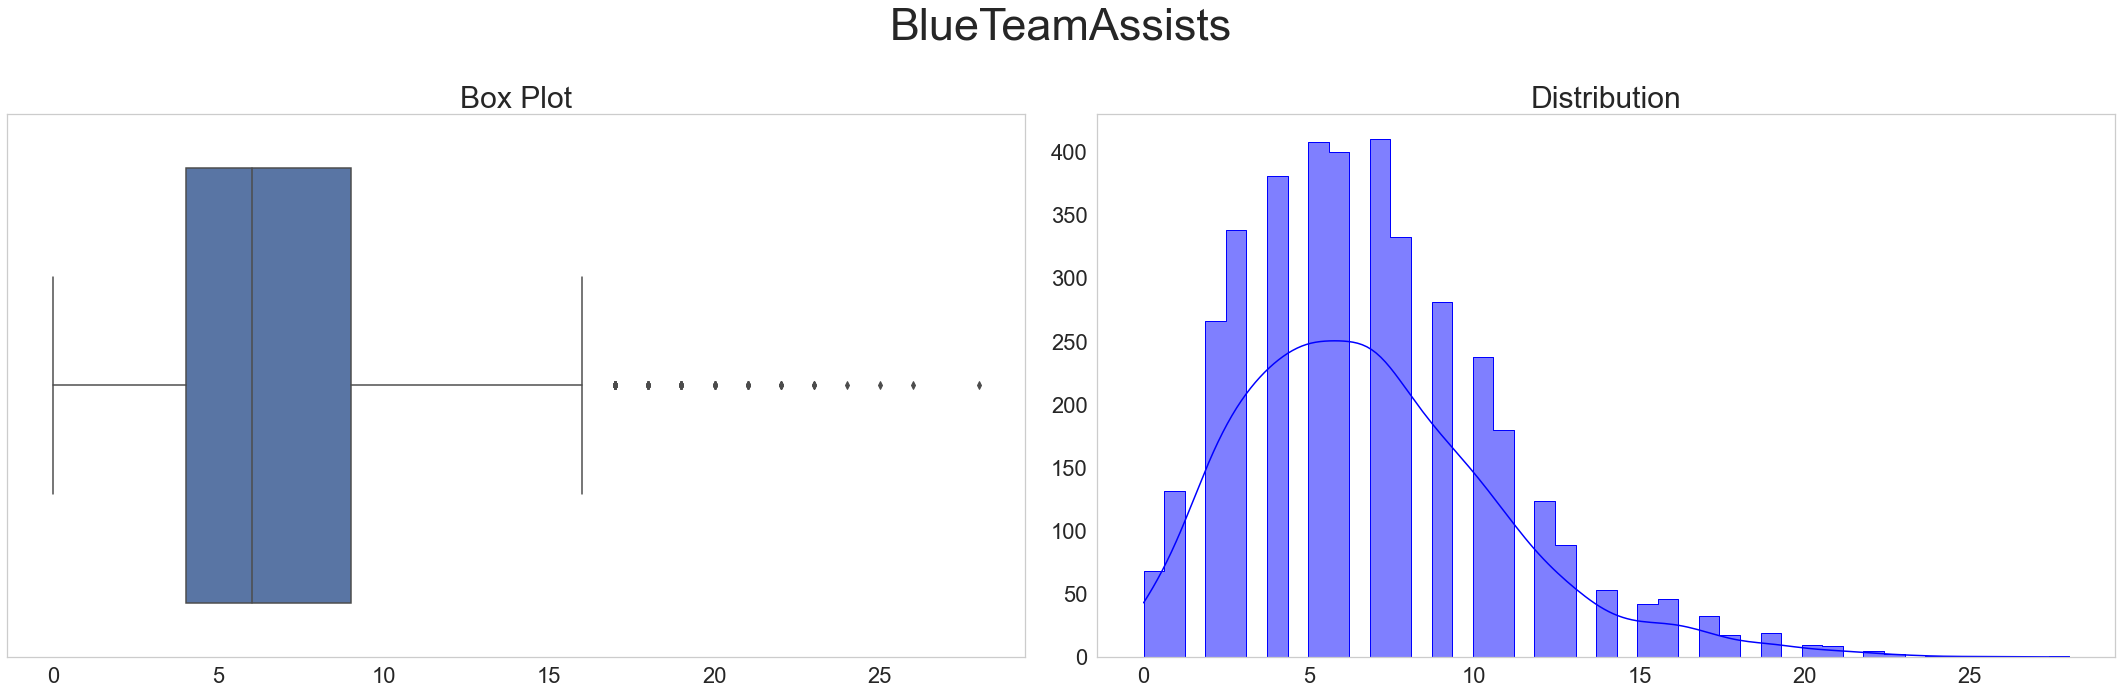

Summary Statistics for BlueTeamAssists
count    3890.000000
mean        6.872751
std         4.002764
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: BlueTeamAssists, dtype: float64


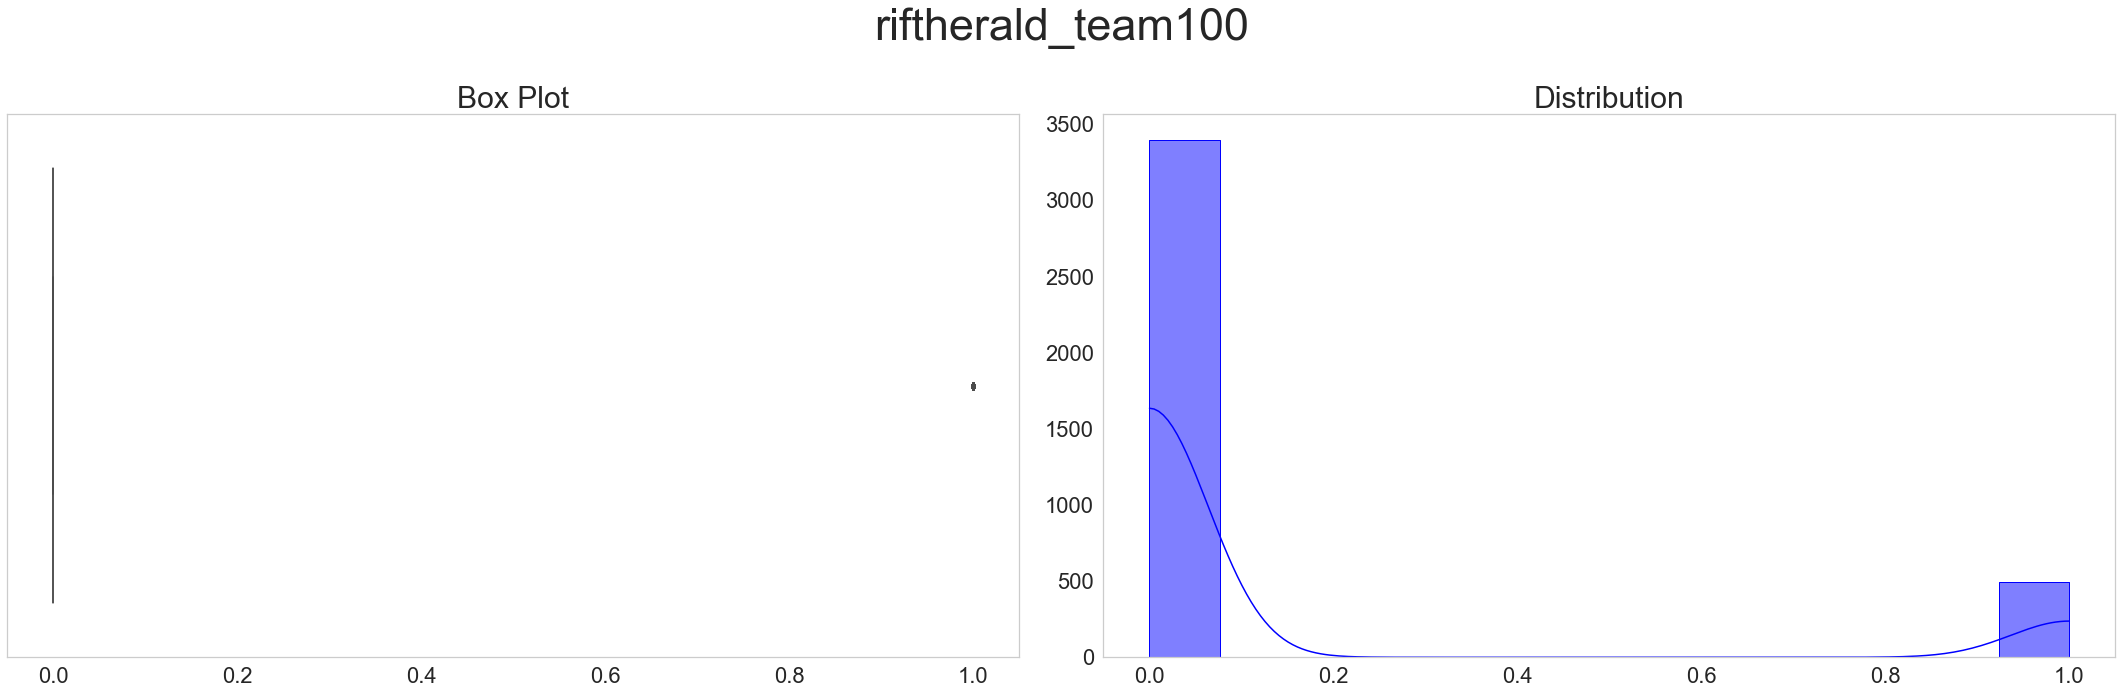

Summary Statistics for riftherald_team100
count    3890.000000
mean        0.126992
std         0.333007
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: riftherald_team100, dtype: float64


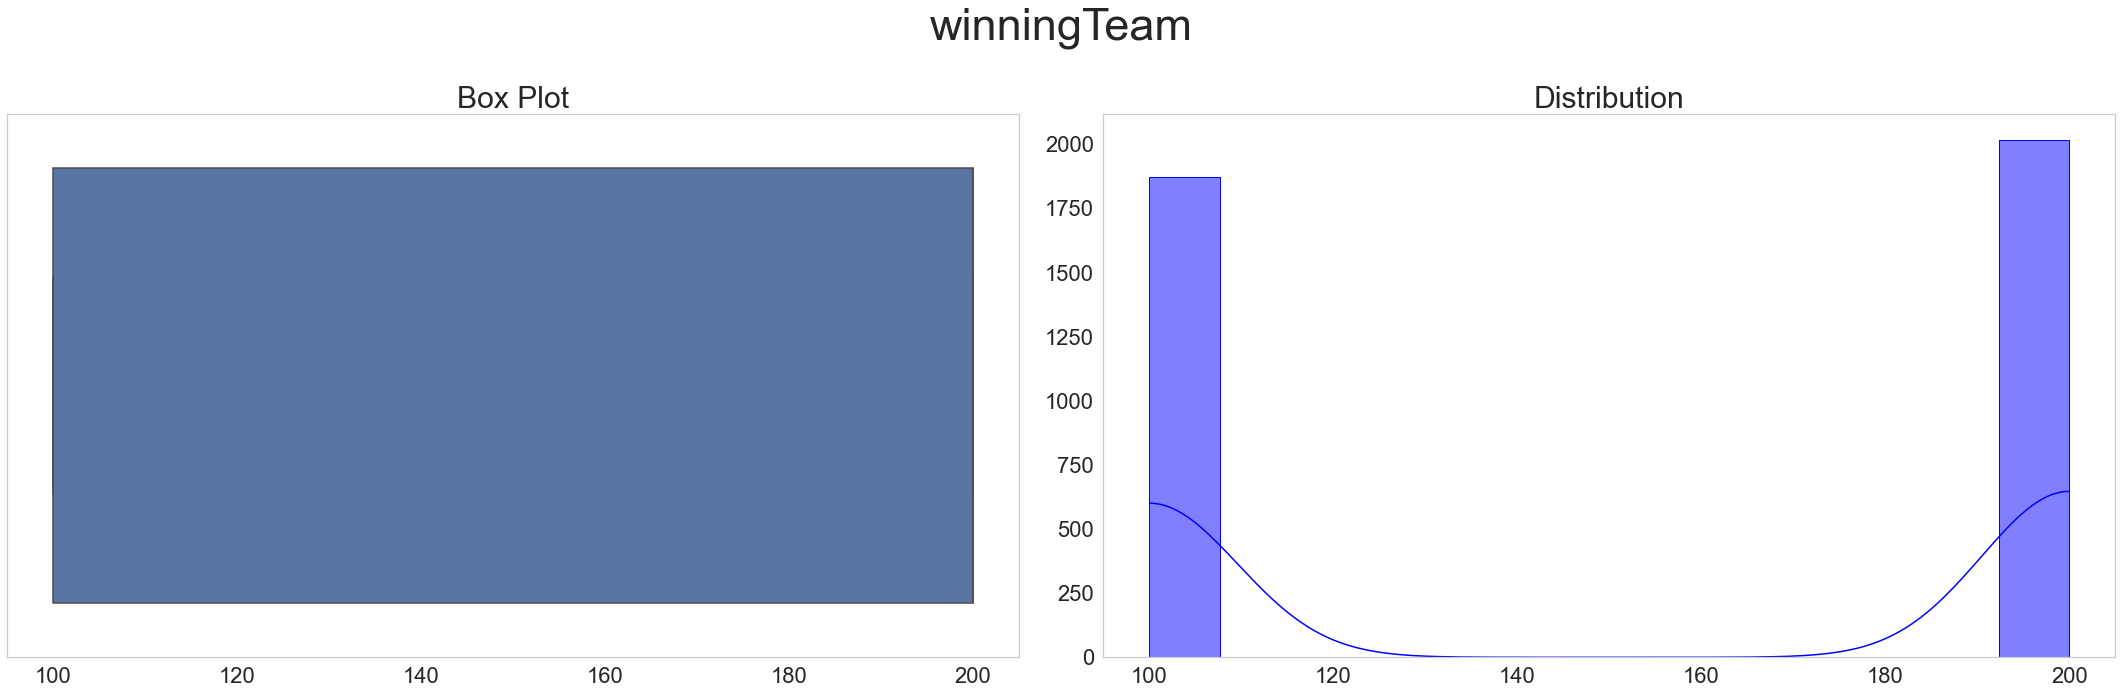

Summary Statistics for winningTeam
count    3890.000000
mean      151.850900
std        49.972154
min       100.000000
25%       100.000000
50%       200.000000
75%       200.000000
max       200.000000
Name: winningTeam, dtype: float64


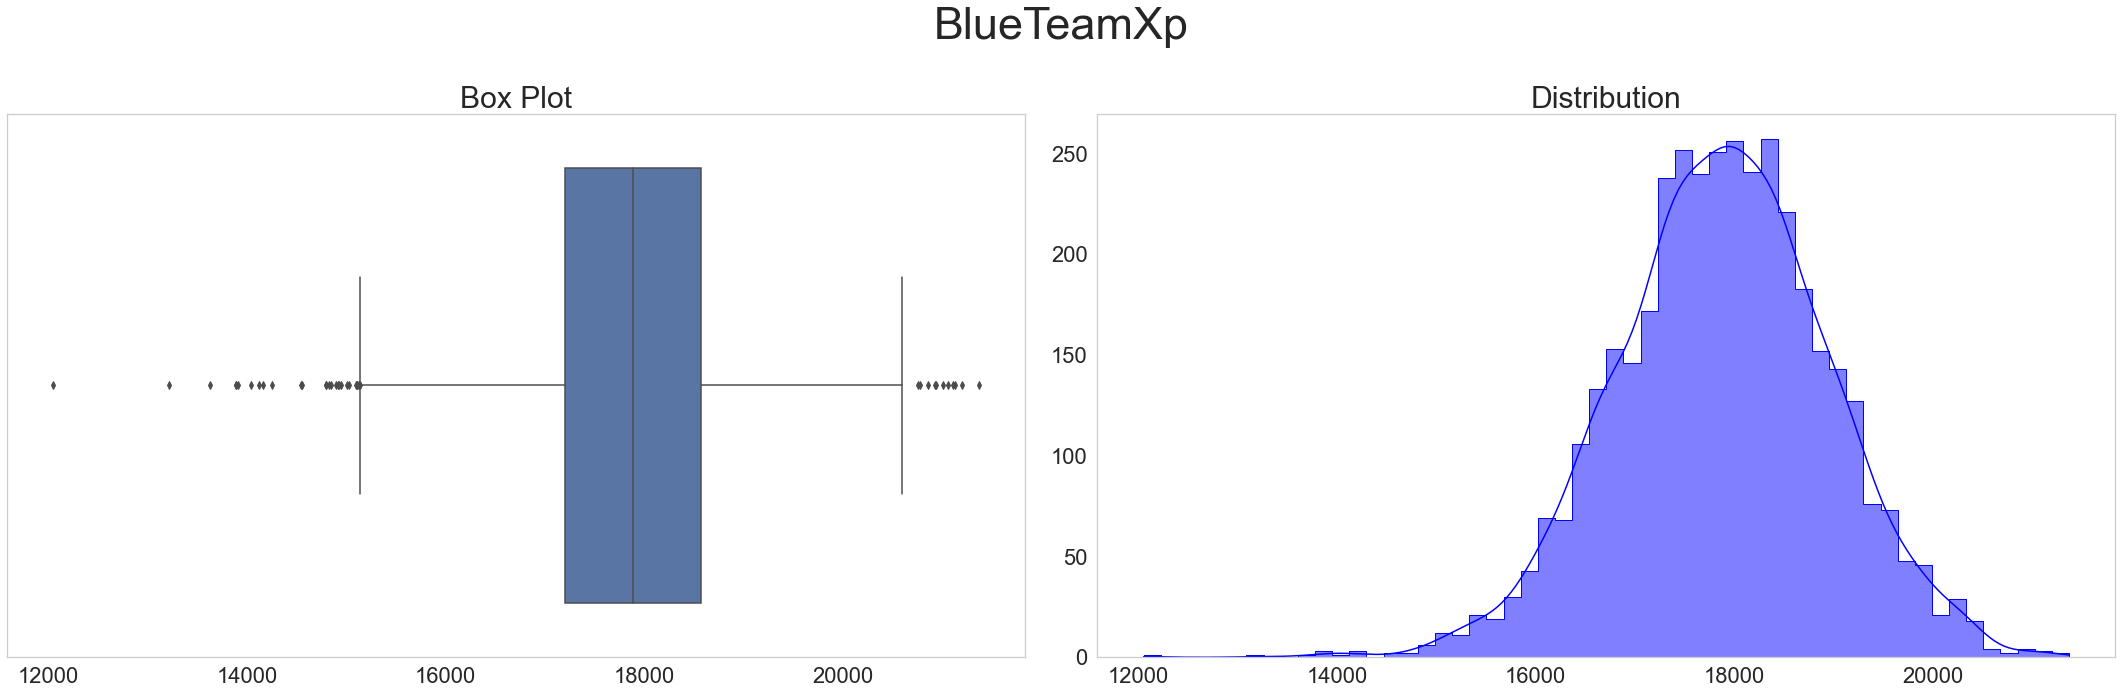

Summary Statistics for BlueTeamXp
count     3890.000000
mean     17873.612853
std       1063.979191
min      12054.000000
25%      17200.250000
50%      17891.000000
75%      18575.000000
max      21368.000000
Name: BlueTeamXp, dtype: float64


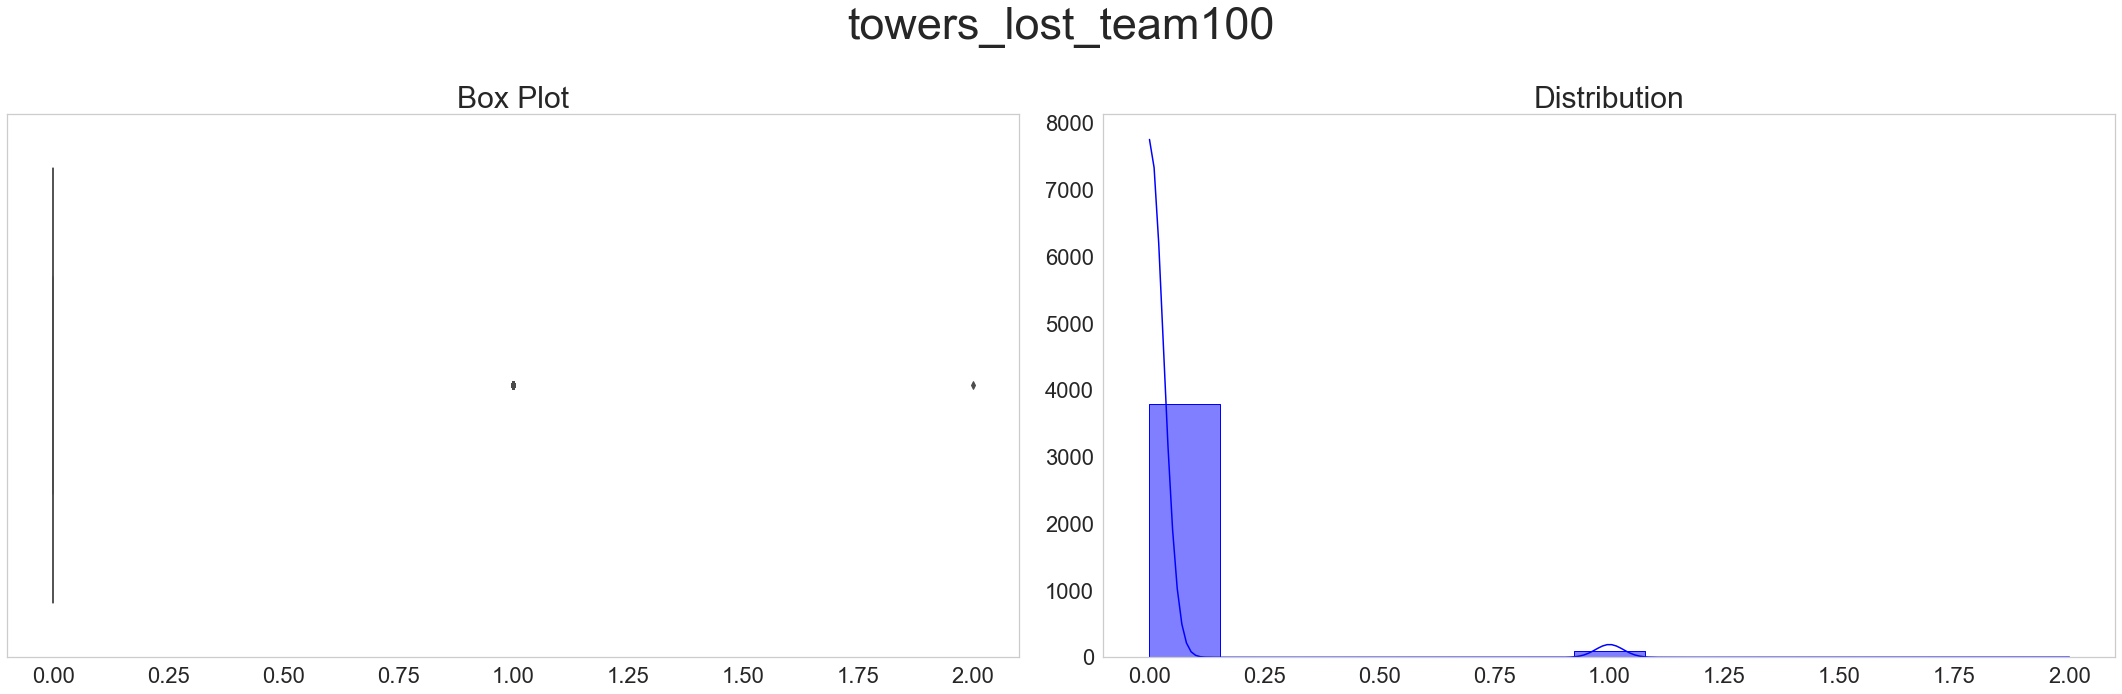

Summary Statistics for towers_lost_team100
count    3890.000000
mean        0.024679
std         0.156812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: towers_lost_team100, dtype: float64


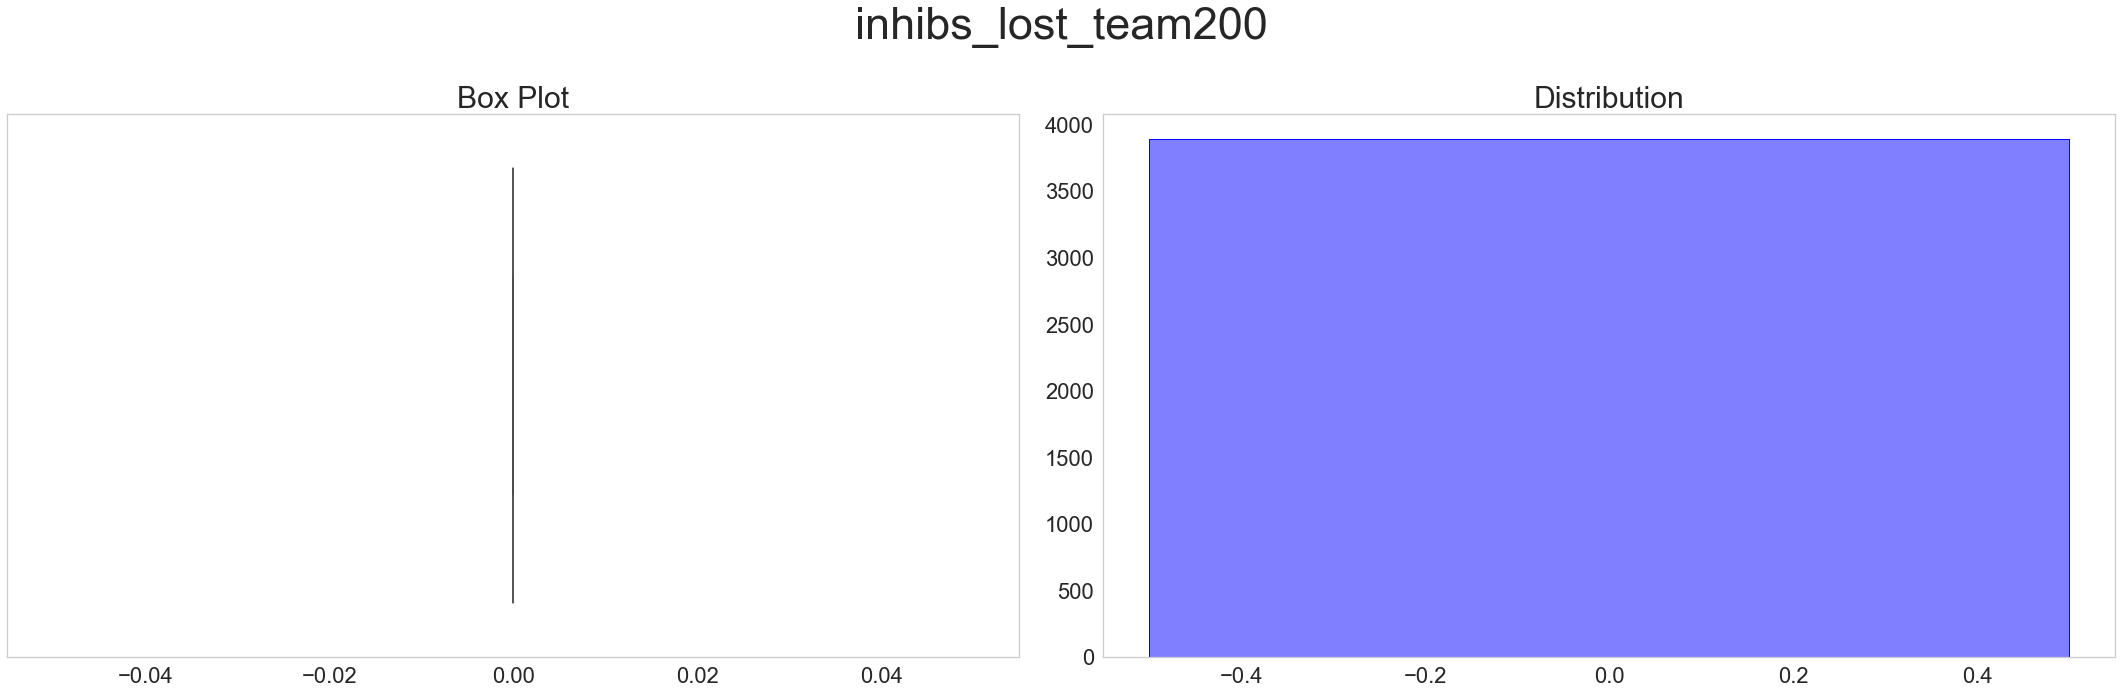

Summary Statistics for inhibs_lost_team200
count    3890.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: inhibs_lost_team200, dtype: float64


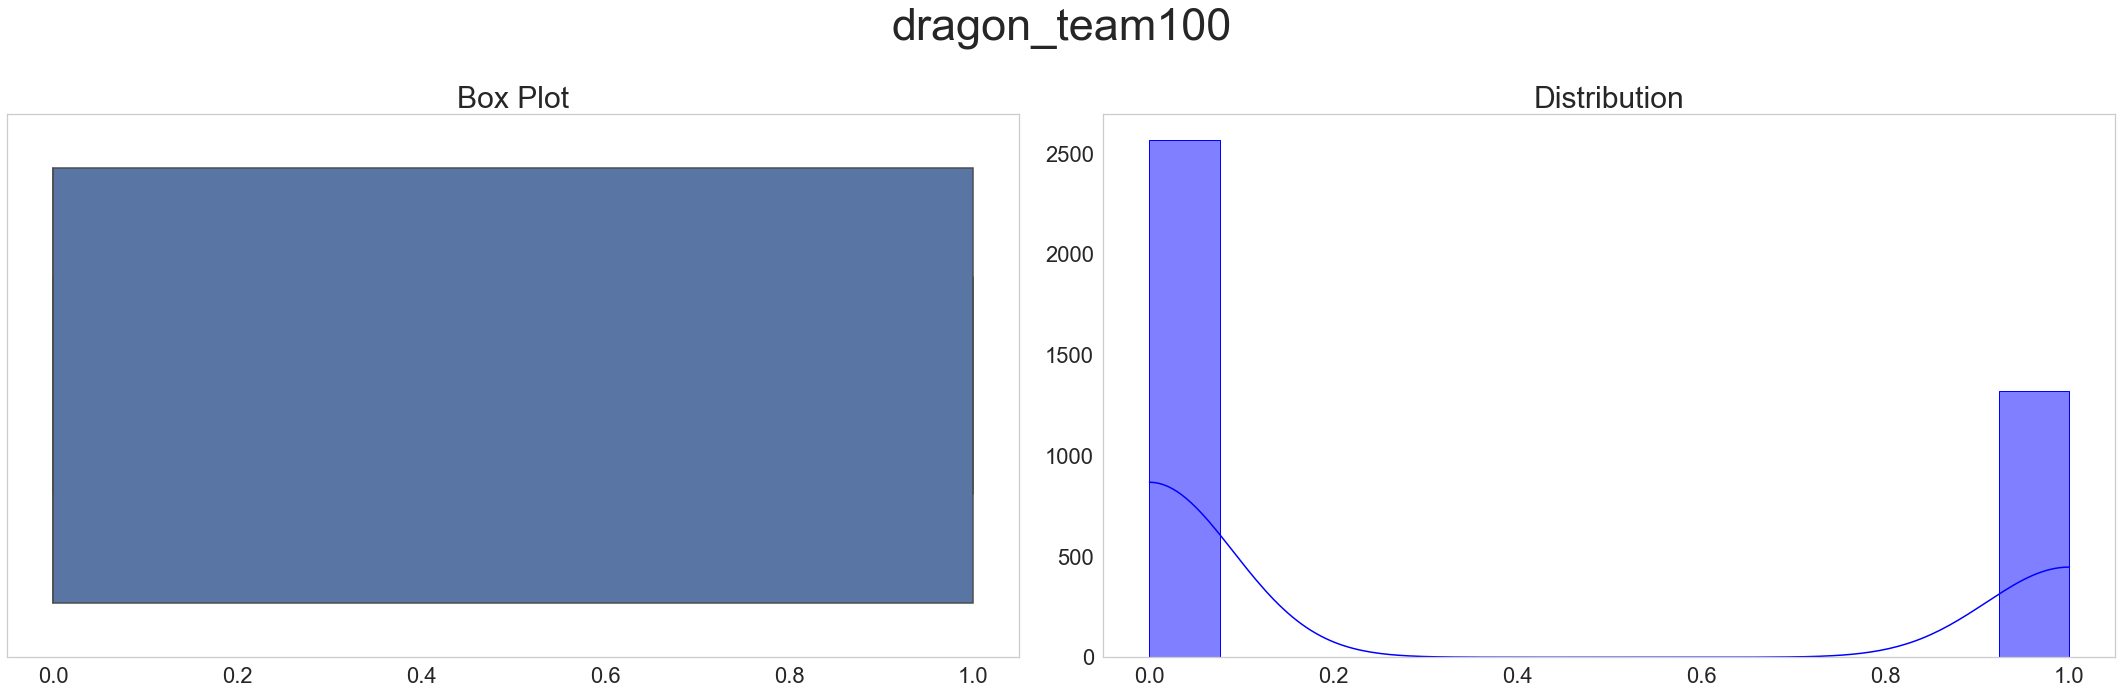

Summary Statistics for dragon_team100
count    3890.000000
mean        0.340103
std         0.473804
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dragon_team100, dtype: float64


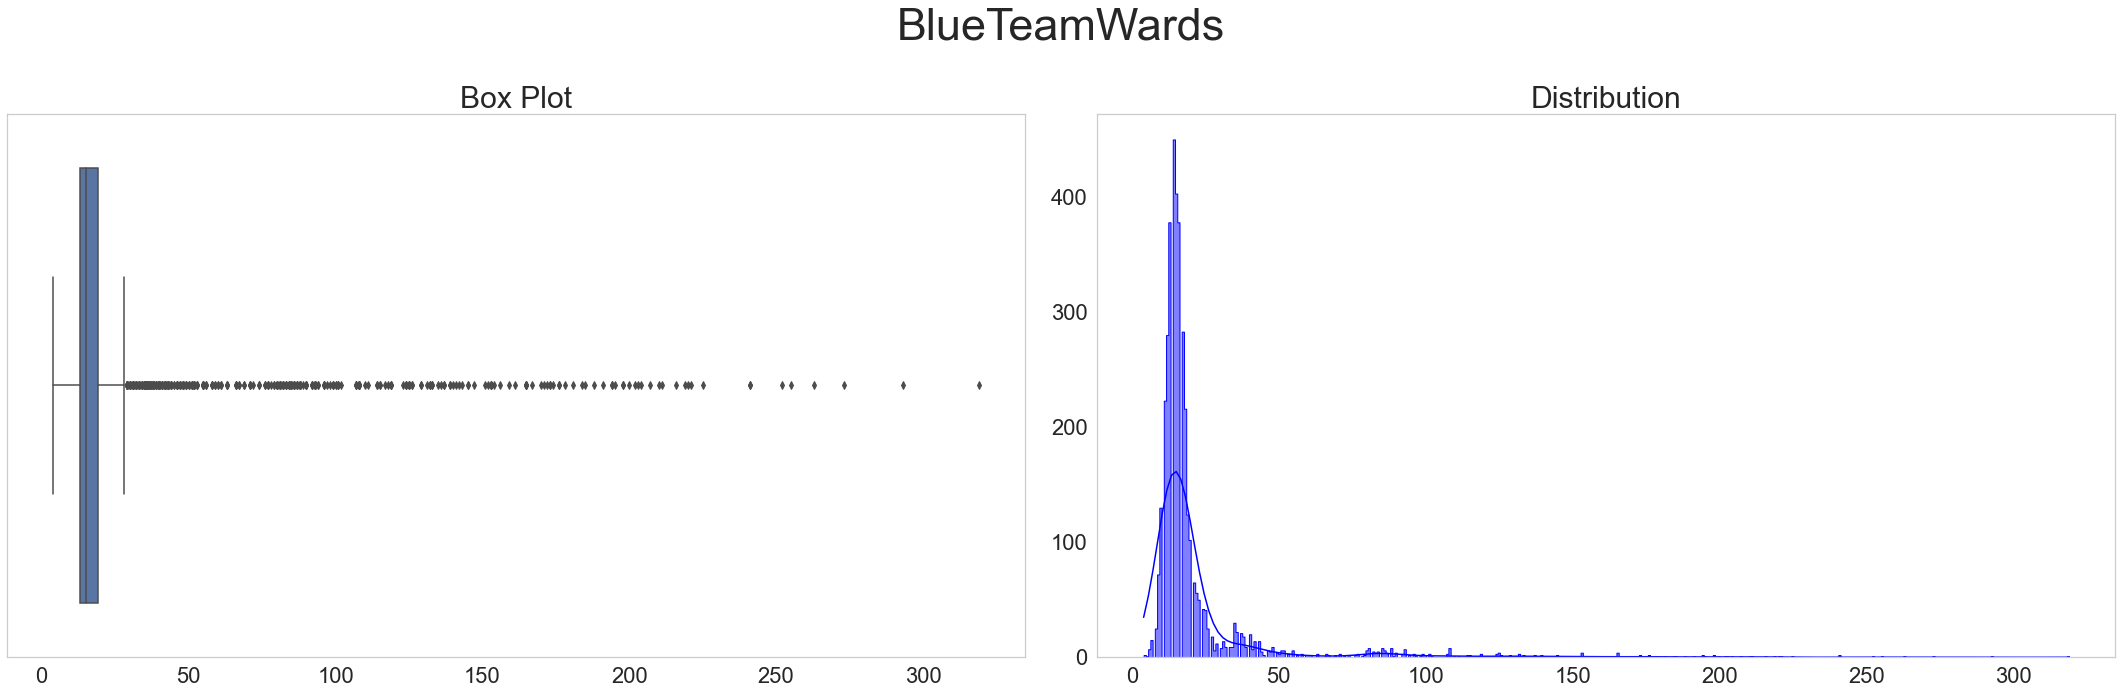

Summary Statistics for BlueTeamWards
count    3890.000000
mean       22.904627
std        27.713071
min         4.000000
25%        13.000000
50%        15.000000
75%        19.000000
max       319.000000
Name: BlueTeamWards, dtype: float64


In [114]:
# univariate study
univariate_study = ['BlueTeamAssists','riftherald_team100','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

<Figure size 864x576 with 0 Axes>

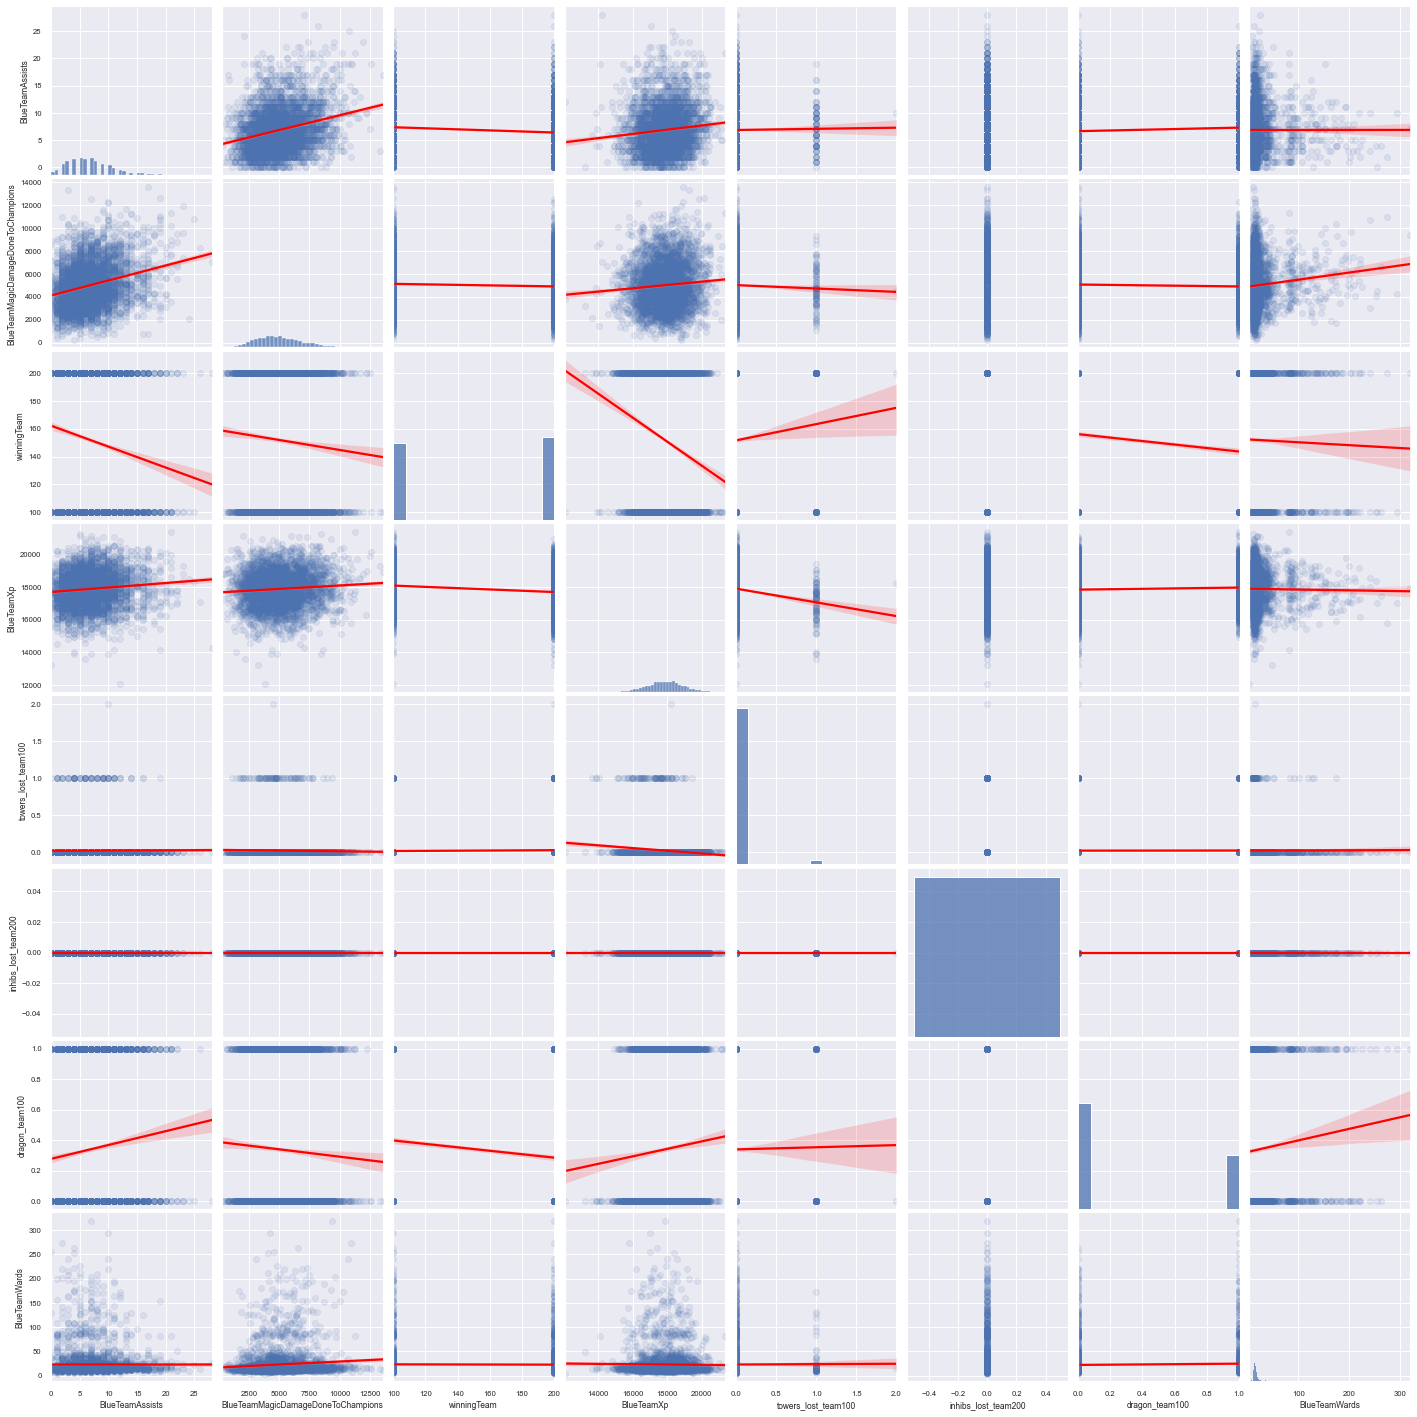

In [19]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['BlueTeamAssists','BlueTeamMagicDamageDoneToChampions','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train, cols)

## Variabe Pairs Takeaway

- Blue team assists are normally distributed with average assists of 22
- Blue team xp increases with increase damage to opponents champion
- Blue team lost an average of 5 towers
- Blue team won on average 

In [80]:
## Heatmap 
#sns.set(font_scale=2)
#plt.figure(figsize=(22,70))
#heatmap = sns.heatmap(df.corr)([['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

corr = train.corr() #
plt.figure(figsize=(22, 70))

heatmap = sns.heatmap(corr(['winningTeam'][(corr >= 0.5) | (corr <= -0.4)].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm'))



TypeError: list indices must be integers or slices, not DataFrame

<Figure size 1584x5040 with 0 Axes>

### Takeaways

- Red Team Correlations: inhibs won: .79, dragons won: .63, baron team won: .54, red team kills: .54
- Blue Team correlations: towers won: .80, dragon team: .65, blue xp: .54, blue team level; .53

In [21]:
cols = ['BlueTeamAssists','riftherald_team100','winningTeam','BlueTeamXp','towers_lost_team100','inhibs_lost_team200','dragon_team100','BlueTeamWards']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 1.3028705079434242e-13. There is 0.0% chance that we see these results by chance.
r = -0.12


<Figure size 864x720 with 0 Axes>

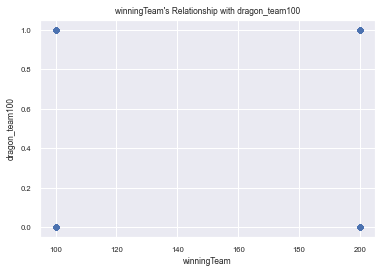

In [23]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'winningTeam','dragon_team100')
# Looks like magice damage done by blue team to champions decreases after 2 inhibitor lost by red team

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: nan. There is nan% chance that we see these results by chance.
r = nan


<Figure size 864x720 with 0 Axes>

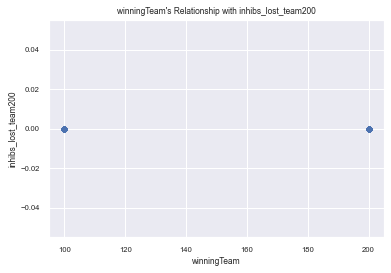

In [26]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'winningTeam','inhibs_lost_team200')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 4.40454133114551e-14. There is 0.0% chance that we see these results by chance.
r = -0.12


<Figure size 864x720 with 0 Axes>

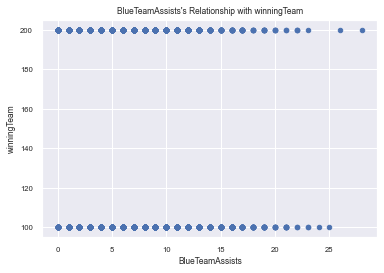

In [27]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamAssists', 'winningTeam')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.47172842486299543. There is 0.472% chance that we see these results by chance.
r = -0.01


<Figure size 864x720 with 0 Axes>

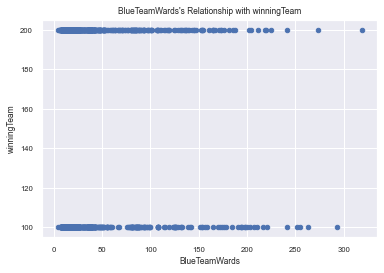

In [28]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'BlueTeamWards', 'winningTeam')
# high correlation between total gold for blue team and the outcome

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.02162186559264935. There is 0.022% chance that we see these results by chance.
r = 0.04


<Figure size 864x720 with 0 Axes>

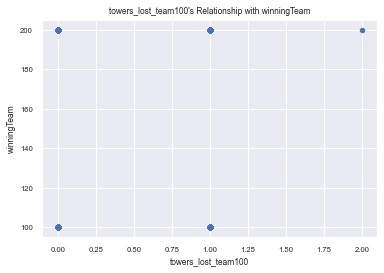

In [29]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'towers_lost_team100', 'winningTeam')
# no correlation

# Exploration

## What key drivers effect the outcome of winning a match?

### Question 1
- Is there a correlation between Blue team losing thier tower or red team losing thier tower and the outcome of the game

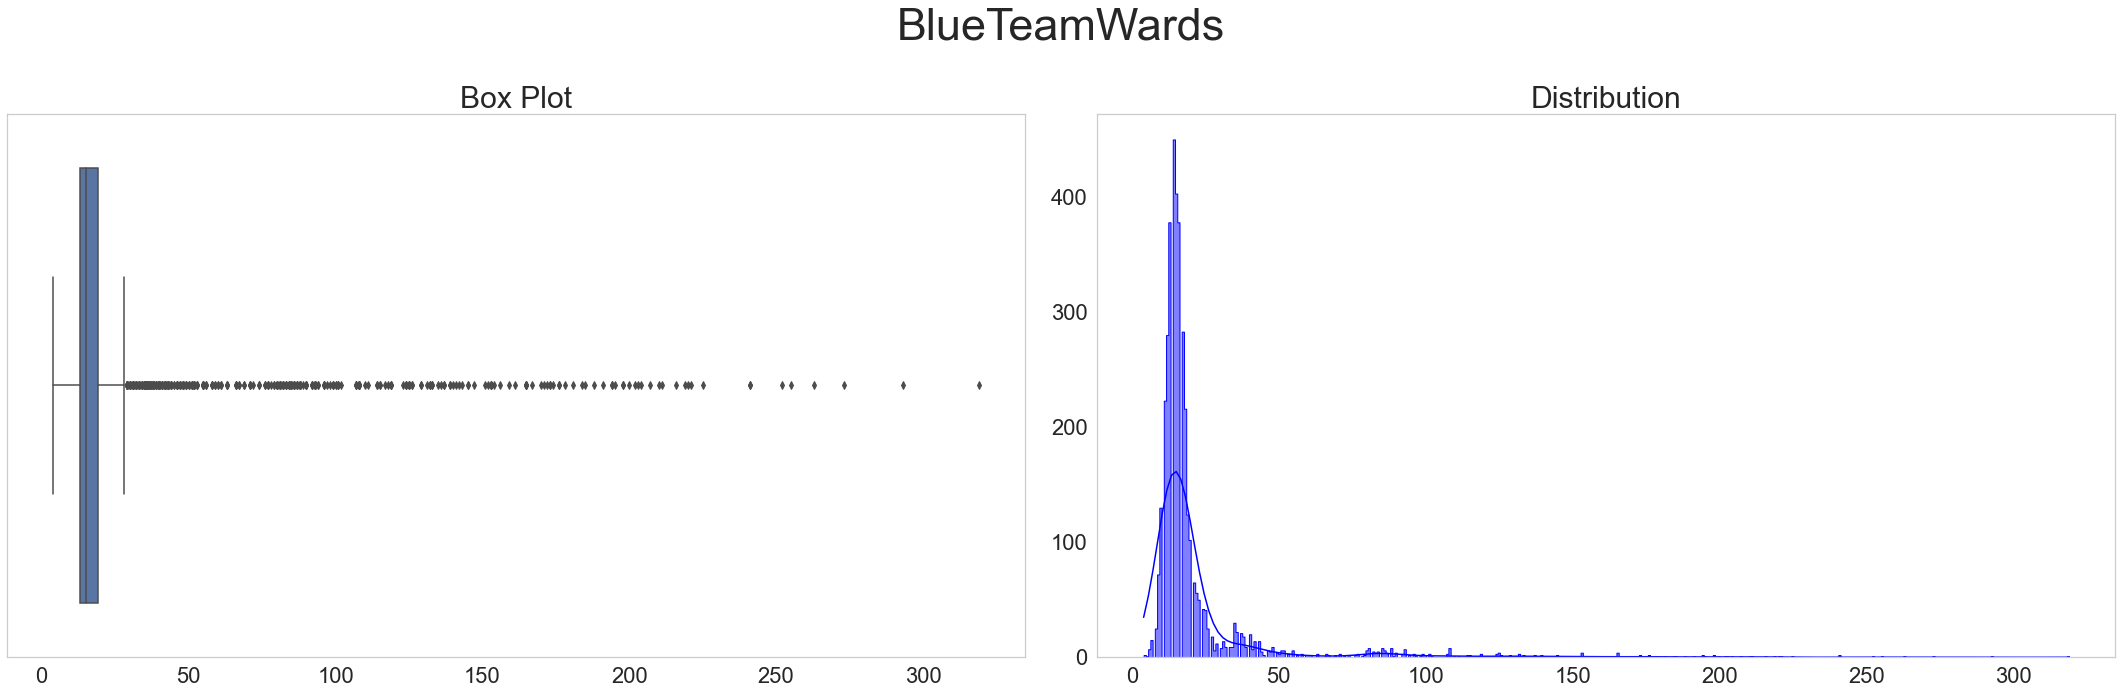

Summary Statistics for BlueTeamWards
count    3890.000000
mean       22.904627
std        27.713071
min         4.000000
25%        13.000000
50%        15.000000
75%        19.000000
max       319.000000
Name: BlueTeamWards, dtype: float64


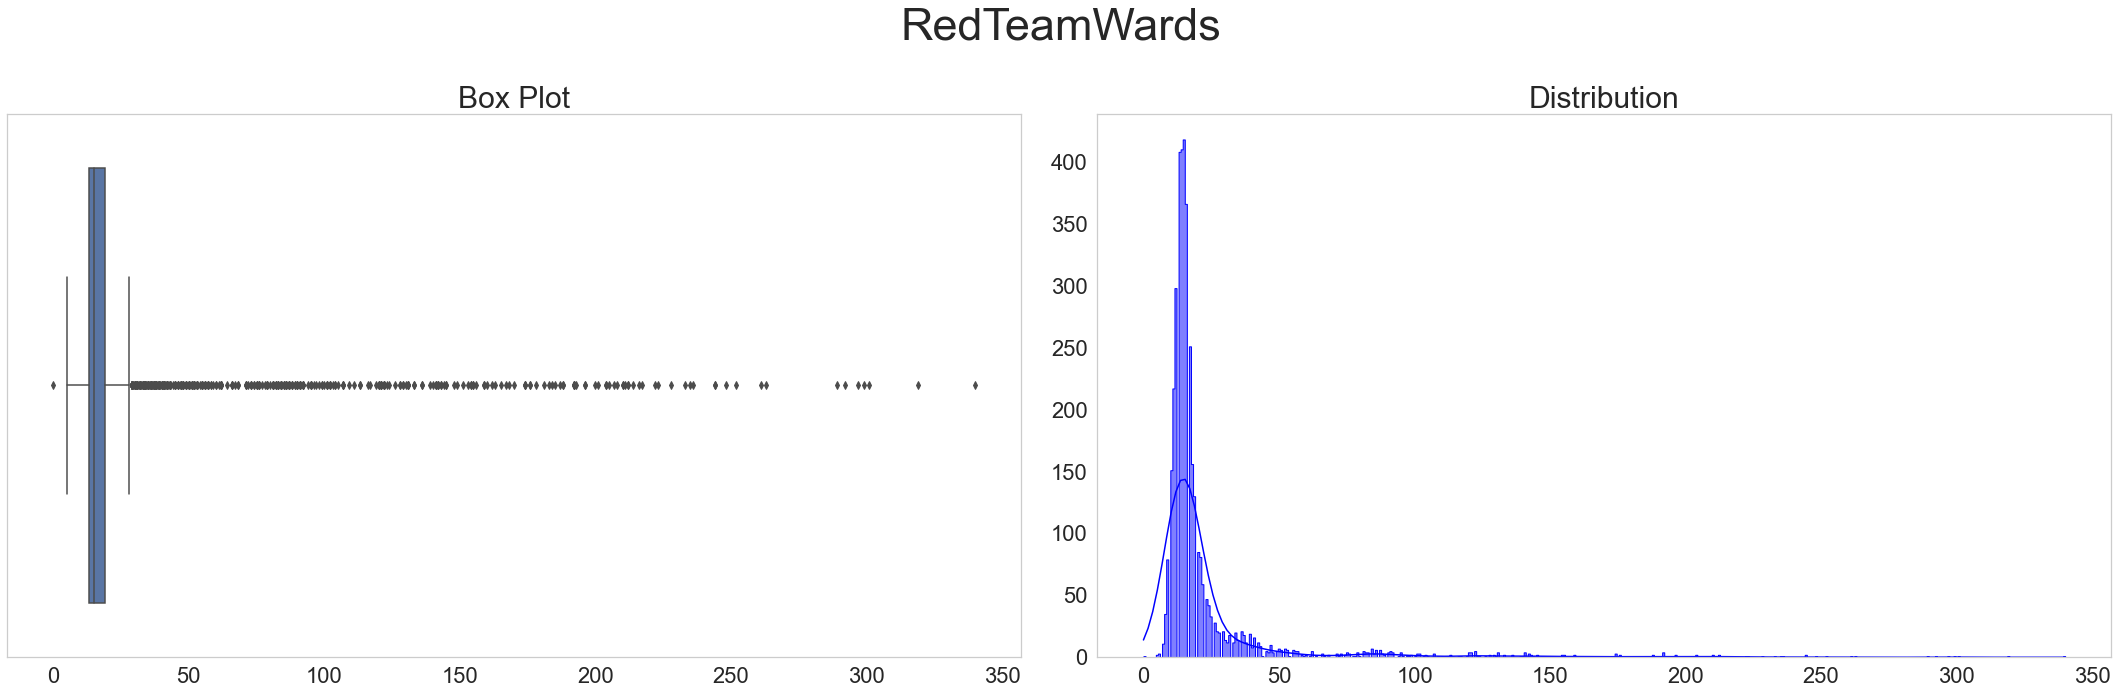

Summary Statistics for RedTeamWards
count    3890.000000
mean       24.014396
std        31.531661
min         0.000000
25%        13.000000
50%        15.000000
75%        19.000000
max       340.000000
Name: RedTeamWards, dtype: float64


In [61]:
# univariate study
univariate_study = ['BlueTeamWards','RedTeamWards']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team lost on average 6 towers and Red team lost on average 6 towers as well
- Both teams towers lost look to be evenly distributed

# Man Whitney U

In [31]:
# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.towers_lost_team100, df.towers_lost_team200)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


2.9958087739754626 0.0835119417847983
blue and red populations do have equal variances


## $H_0$: Red team that loses less then 5 towers will not give the blue team victory

## $H_a$: Red team that loses more then 5 towers will give the blue team the victory

In [62]:
import scipy.stats as stats
# hypothesis testing

null_hypothesis = "Red team towers lost < .5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > .5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > .5]
little_loss = train[train.towers_lost_team200 <= .5]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.031114311791105305
Reject null hypothesis that: Red team towers lost < .5 has no difference in the outcome of the game
There is evidence to suggest: Red team towers lost > .5 has a difference in the outcome of the game


### Hypothesis Results:
- There is a difference when the red team loses 5 or more towers that will give the blue team the victory

### Takeaways
- I have a 95% confidence level that there is a difference in outcome when red team loses 5 or more towers
- Red and blue team towers lost averages are almost identical
- Red or blue towers lost could be useful in the modeling phase

### Question 2
- Is there a correlation between Blue team xp, red team xp and the outcome of the game

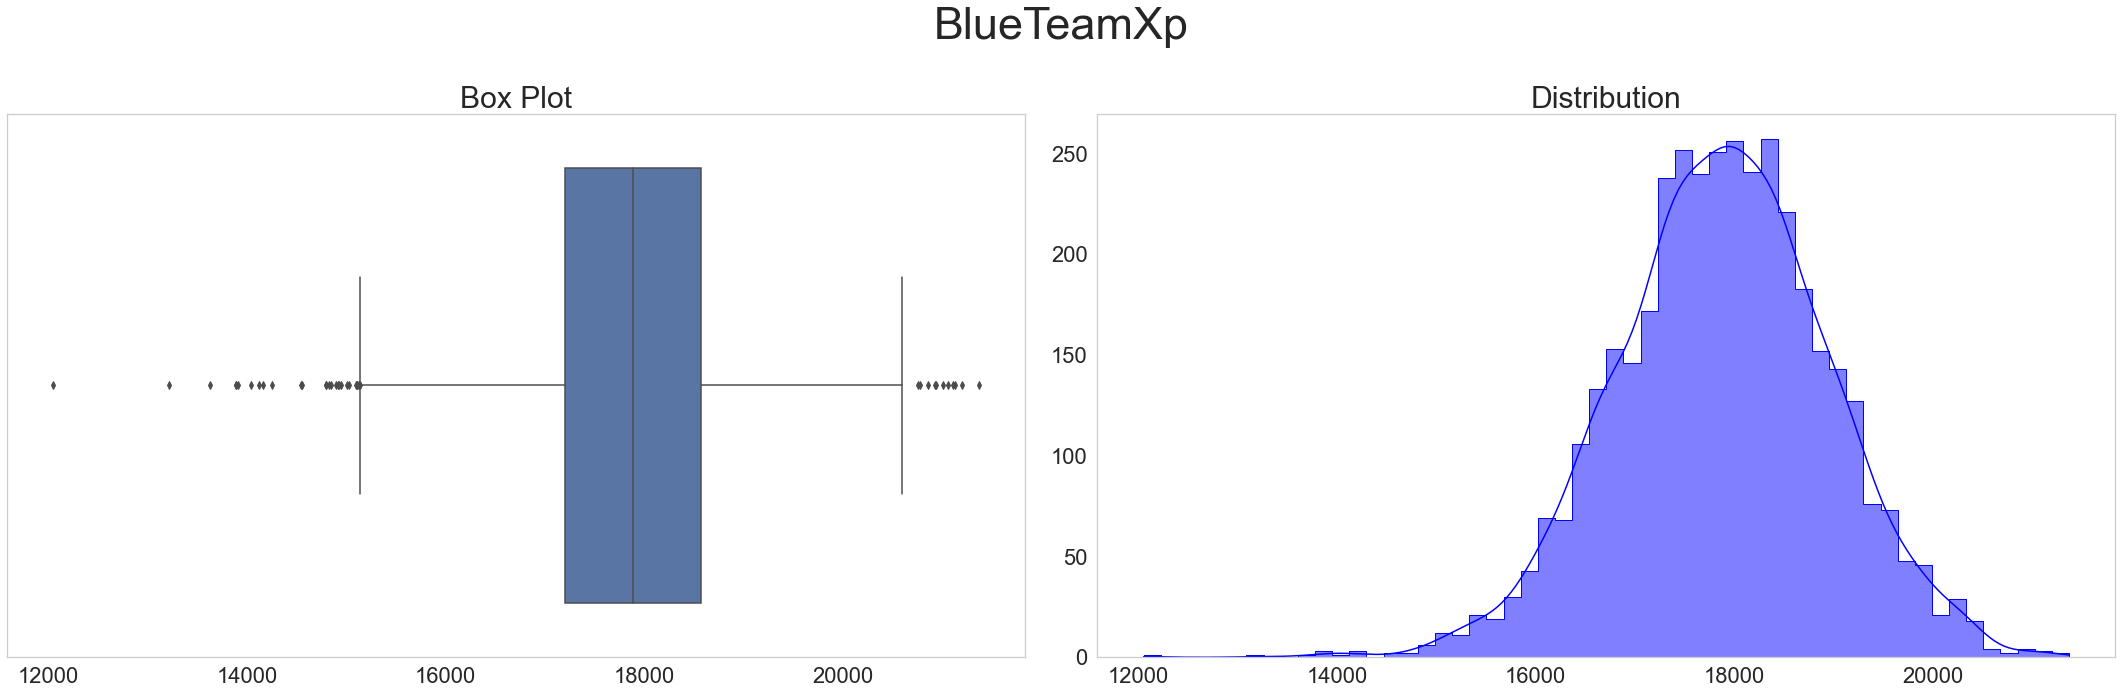

Summary Statistics for BlueTeamXp
count     3890.000000
mean     17873.612853
std       1063.979191
min      12054.000000
25%      17200.250000
50%      17891.000000
75%      18575.000000
max      21368.000000
Name: BlueTeamXp, dtype: float64


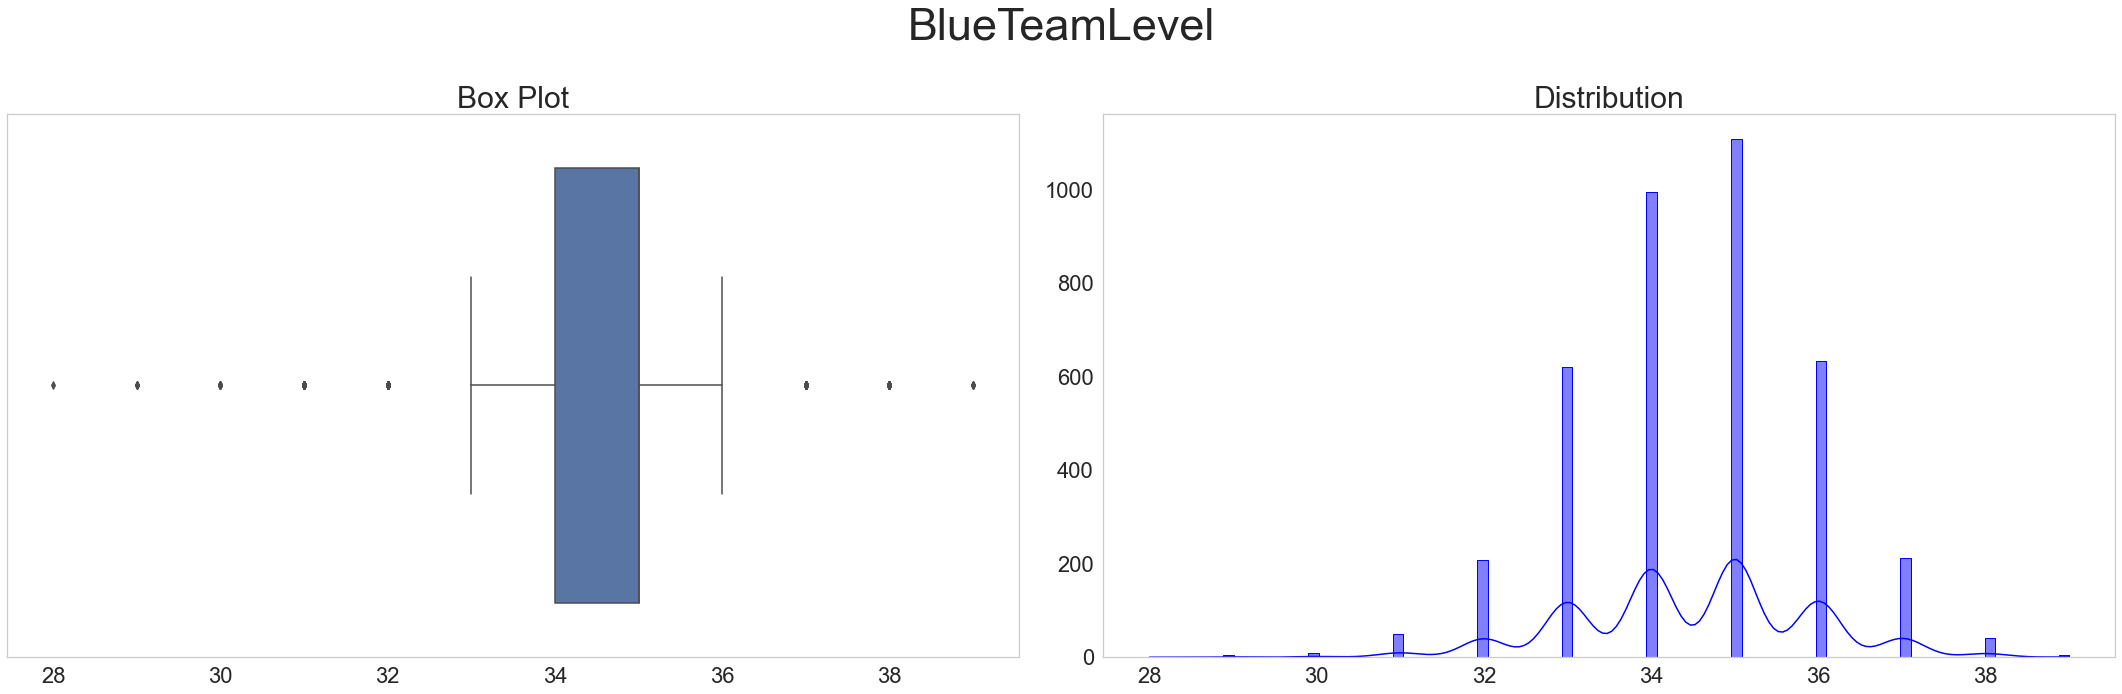

Summary Statistics for BlueTeamLevel
count    3890.000000
mean       34.501799
std         1.392454
min        28.000000
25%        34.000000
50%        35.000000
75%        35.000000
max        39.000000
Name: BlueTeamLevel, dtype: float64


In [41]:
# univariate study
univariate_study = ['BlueTeamXp','BlueTeamLevel']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

- Blue team averaged 41,253 xp and Red team averaged 41,593 xp
- Both teams xp's are normally distributed

# Man Whitney U

In [34]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.BlueTeamXp, df.RedTeamXp)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")


0.6444149724552632 0.4221361982846129
blue and red populations do have equal variances


In [71]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "Red team xp that is > 17,000 will not lead to a blue team win"
alternative_hypothesis = "Red team xp that is < 17,000 will lead to a blue team win"
a = 0.05 #a for alpha 

big_xp = train[train.RedTeamXp > 17_000]
little_xp = train[train.RedTeamXp <= 17_000]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

9.019095590180439e-16
Reject null hypothesis that: Red team xp that is > 17,000 will not lead to a blue team win
There is evidence to suggest: Red team xp that is < 17,000 will lead to a blue team win


### Hypothesis Results:
- There is a difference when the red team has more then 41k xp vs less then 41k xp that could lead to a blue team win

### Takeaways
- I have a 95% confidence level that there is a difference in outcome when red team has more then 41k xp
- Red and blue team xp means are almost the same
- Red or blue xp could be useful in the modeling phase

# Bivariate 

## Physical Damage

Damage by blue and outcome


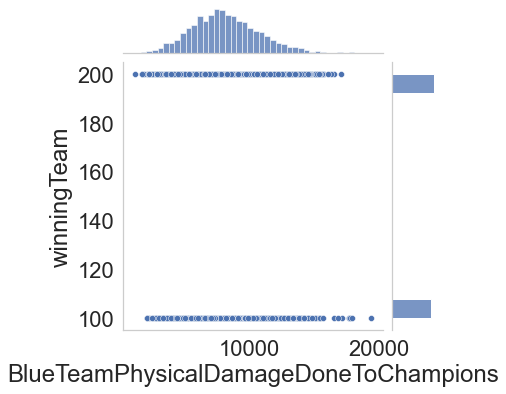

In [36]:
#winningTeam across physical damage to champions for blue team
print('Damage by blue and outcome')
sns.jointplot(x='BlueTeamPhysicalDamageDoneToChampions', y='winningTeam', data=train)
plt.xlabel('Damage')
plt.ylabel('Winning Team')
plt.show()


### Ho: Blue team total physical damage over 20k will not be significant for the outcome of the game

### Ha: Blue team total physical damage less then or equal 20k will be significant for the outcome of the game

In [38]:
# hypothesis testing

null_hypothesis = "BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.BlueTeamPhysicalDamageDoneToChampions > 17_000]
little_damage = train[train.BlueTeamPhysicalDamageDoneToChampions <= 17_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.04650445345044296
Reject null hypothesis that: BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game


- Team damage over 20k does not effect the outcome of the game

## Team Level 

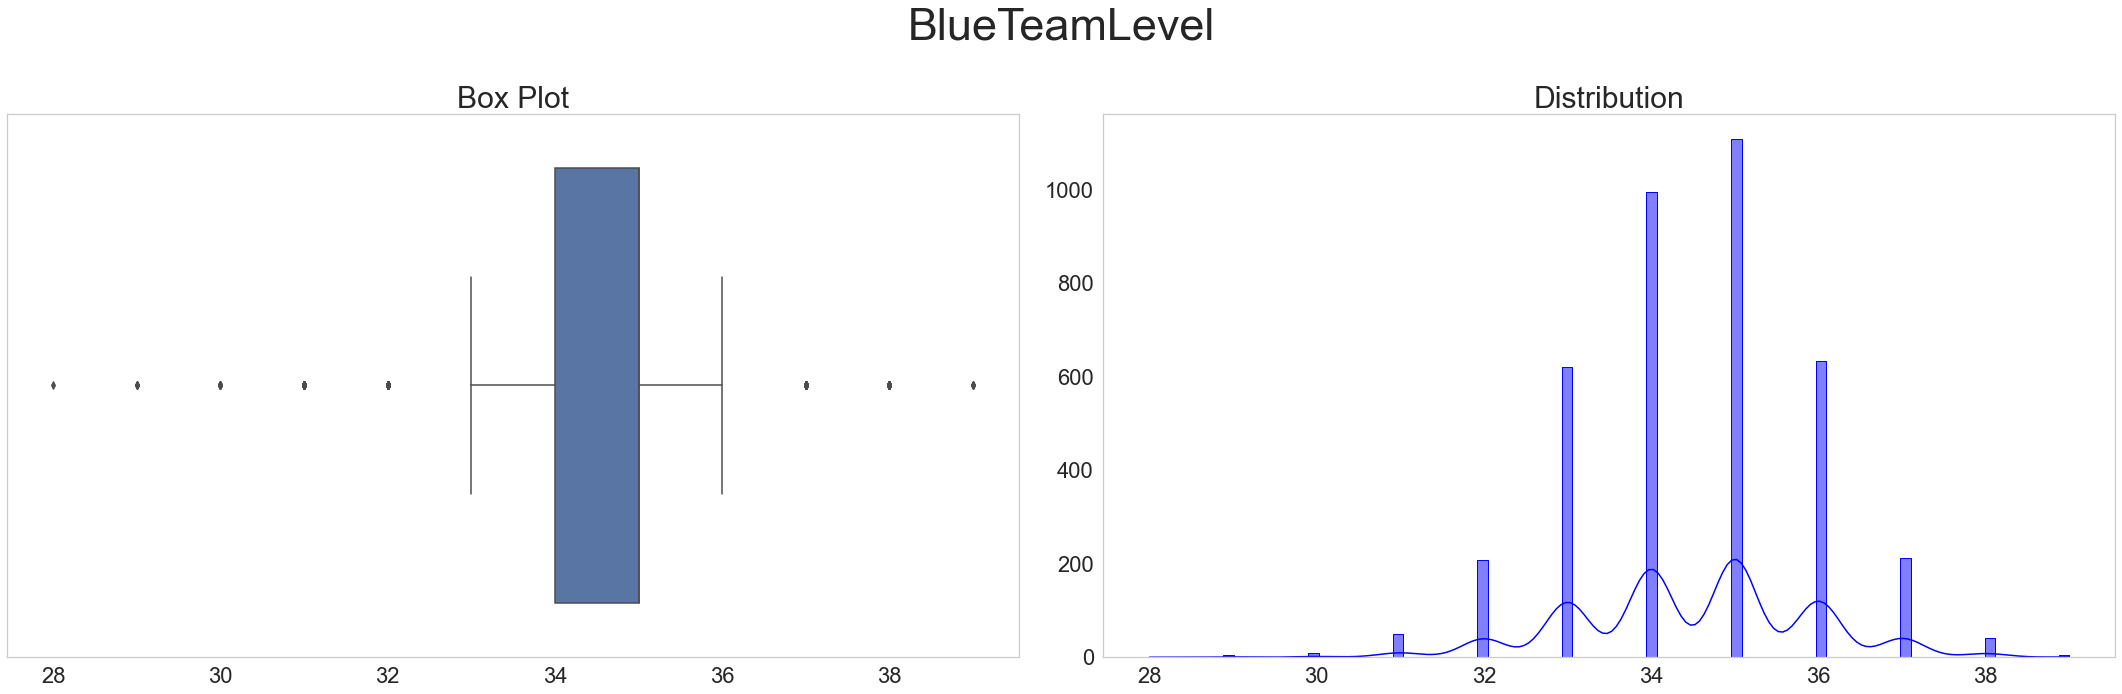

Summary Statistics for BlueTeamLevel
count    3890.000000
mean       34.501799
std         1.392454
min        28.000000
25%        34.000000
50%        35.000000
75%        35.000000
max        39.000000
Name: BlueTeamLevel, dtype: float64


In [64]:
# univariate study
univariate_study = ['BlueTeamLevel']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

### Ho: Average Blue team level of less then 34  will not be significant for the outcome of the game

### Ha: Average Blue team level of 34 and over will be significant for the outcome of the game

In [65]:
# hypothesis testing
import scipy.stats as stats
null_hypothesis = "BlueTeamLevel < 34 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamLevel > 34 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.BlueTeamLevel > 34]
little_level = train[train.BlueTeamLevel <= 34]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

8.069404645826682e-15
Reject null hypothesis that: BlueTeamLevel < 34 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamLevel > 34 has a difference in the outcome of the game


- A team who has an average level of 34 and over has significant effect on the game

## Wards

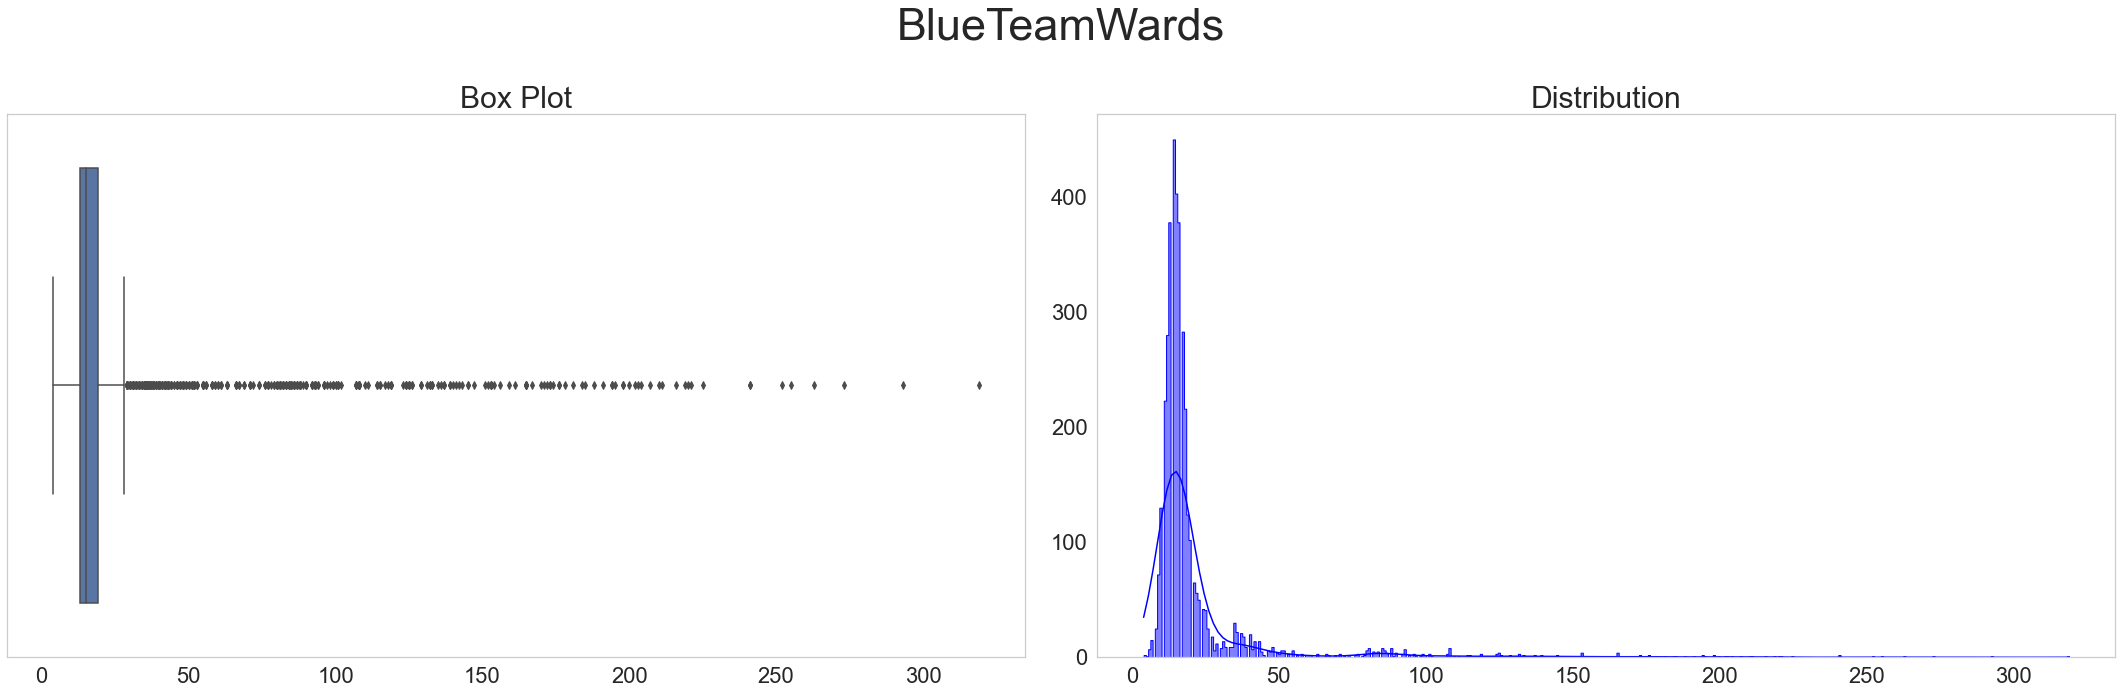

Summary Statistics for BlueTeamWards
count    3890.000000
mean       22.904627
std        27.713071
min         4.000000
25%        13.000000
50%        15.000000
75%        19.000000
max       319.000000
Name: BlueTeamWards, dtype: float64


In [66]:
# univariate study
univariate_study = ['BlueTeamWards']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

## Ho: Blue team wards less then 22 will not make a difference in the outcome of the game

## Ha: Blue team wards greater then 22 will make a difference in the outcome of the game

In [67]:
# hypothesis testing

null_hypothesis = "BlueTeamWards < 22 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamWards > 22 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_ward = train[train.BlueTeamWards > 22]
little_ward = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_ward.winningTeam, little_ward.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.7189068121825134
Fail to reject null hypothesis that: BlueTeamWards < 22 has no difference in the outcome of the game There is not sufficient evidence to reject it.


## Team Assists

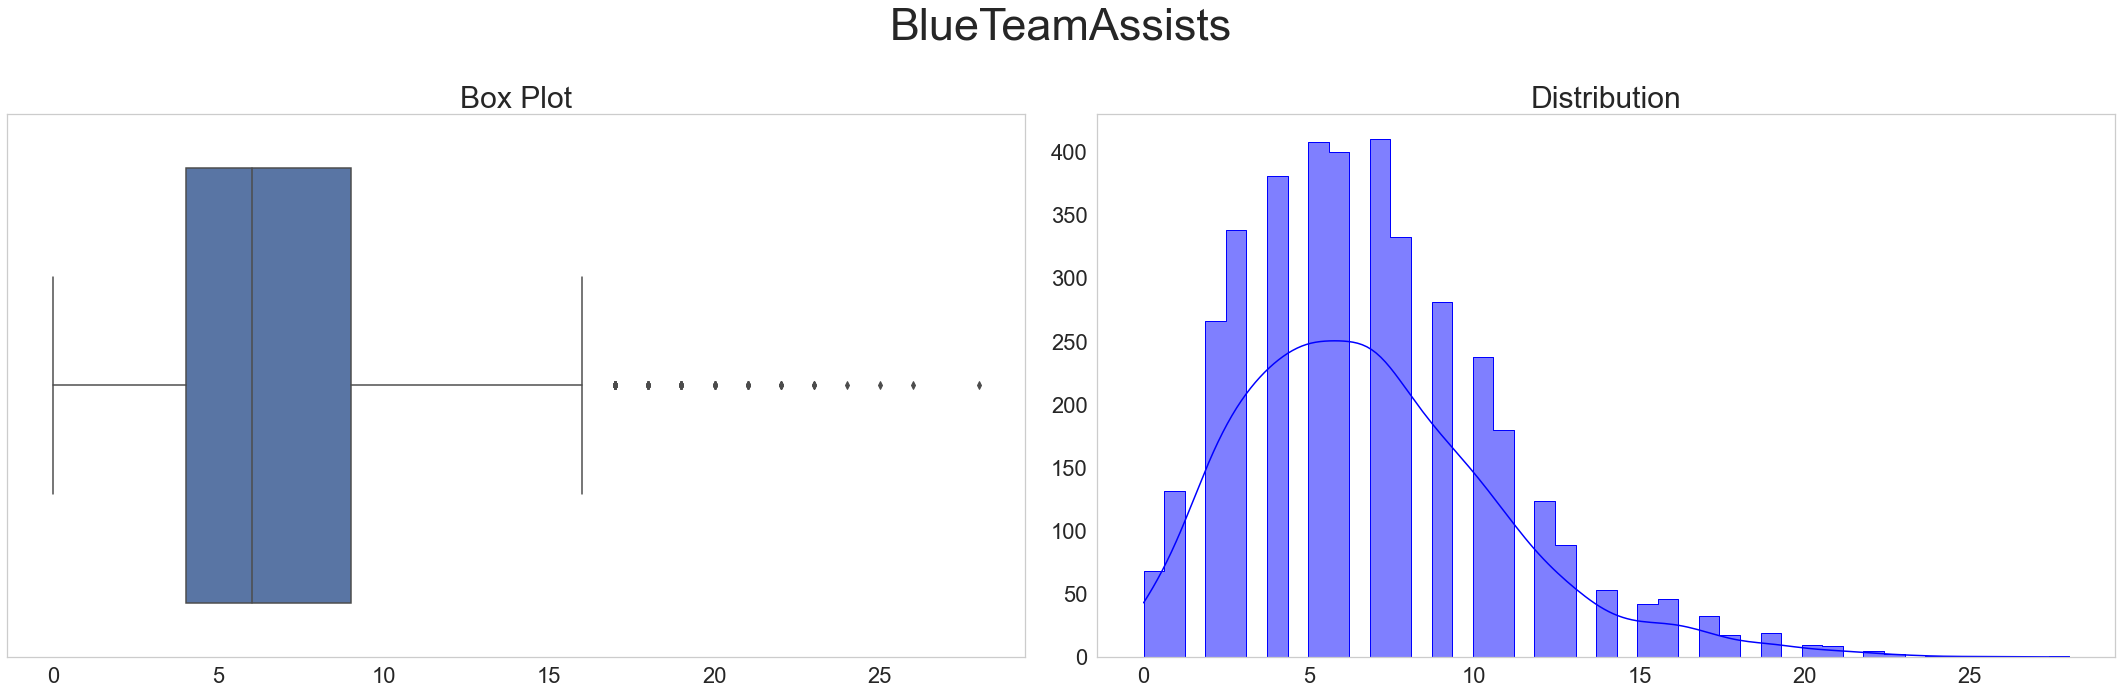

Summary Statistics for BlueTeamAssists
count    3890.000000
mean        6.872751
std         4.002764
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: BlueTeamAssists, dtype: float64


In [68]:
# univariate study
univariate_study = ['BlueTeamAssists']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

## Ho: Blue team with assists under 6 will not have a difference in the outcome of the game

## Ha: Blue team with assists over 6 will have a difference in the outcome of the game

In [69]:
# hypothesis testing

null_hypothesis = "BlueTeamAssists < 6 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamAssists > 6 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_assists = train[train.BlueTeamAssists > 6]
little_assists = train[train.BlueTeamAssists <= 6]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.1916463362209632e-07
Reject null hypothesis that: BlueTeamAssists < 6 has no difference in the outcome of the game
There is evidence to suggest: BlueTeamAssists > 6 has a difference in the outcome of the game


## Towers 

In [ ]:
#winningTeam across towers taken for blue team
print('Team towers taken and outcome')
sns.jointplot(x='towers_lost_team200', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

## Ho: Red team that loses less then 5 towers will not have a difference in the outcome of the game

## Ha: Red team that loses more then 5 towers will have a difference in the outcome of the game

In [46]:
# hypothesis testing

null_hypothesis = "Red team towers lost < 5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 1]
little_loss = train[train.towers_lost_team200 <= 1]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

nan
Fail to reject null hypothesis that: Red team towers lost < 5 has no difference in the outcome of the game There is not sufficient evidence to reject it.


Team dragons taken and outcome


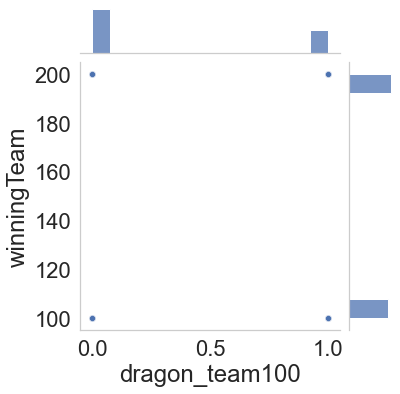

In [47]:
#winningTeam and dragon taken for blue team
print('Team dragons taken and outcome')
sns.jointplot(x='dragon_team100', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

In [73]:
# hypothesis testing

null_hypothesis = "Blue team takes < 2 dragons has no difference in the outcome of the game"
alternative_hypothesis = "Blue team takes > 2 dragons has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_gain = train[train.dragon_team100 > 0]
little_gain = train[train.dragon_team100 <= 1]
t, p = stats.ttest_ind(big_gain.winningTeam, little_gain.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

2.1923685160049433e-07
Reject null hypothesis that: Blue team takes < 2 dragons has no difference in the outcome of the game
There is evidence to suggest: Blue team takes > 2 dragons has a difference in the outcome of the game


## Multivariate 

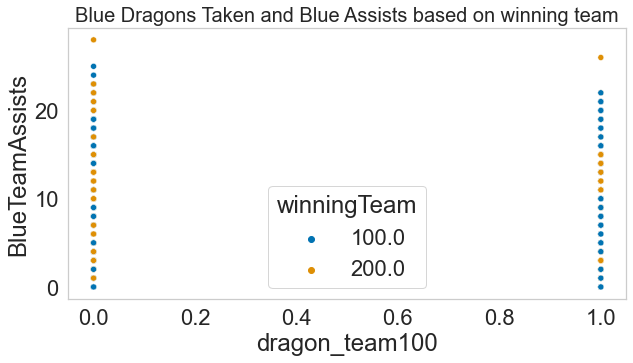

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='dragon_team100',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Dragons Taken and Blue Assists based on winning team', fontsize = 20)
plt.show()

In [50]:
big_assists = train[train.dragon_team100 > 0]
little_assists = train[train.BlueTeamAssists > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

5.431730807128743e-07


- Blue team more then likely to win if the assist were above 30 and 2 or more dragons killed

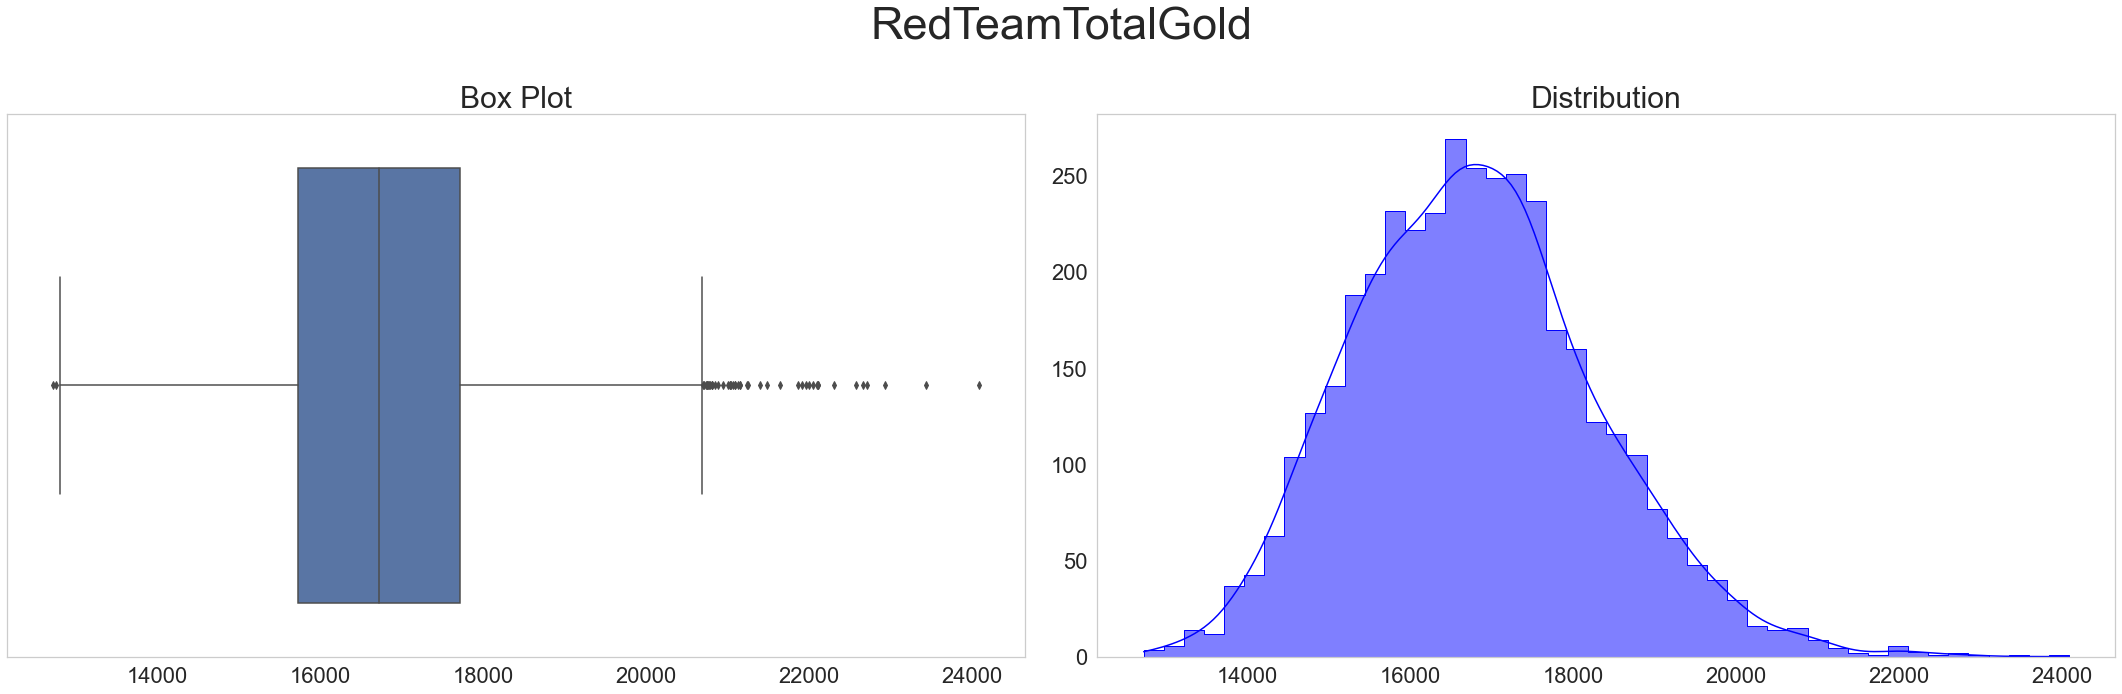

Summary Statistics for RedTeamTotalGold
count     3890.000000
mean     16797.451928
std       1507.940975
min      12729.000000
25%      15733.250000
50%      16729.500000
75%      17717.000000
max      24085.000000
Name: RedTeamTotalGold, dtype: float64


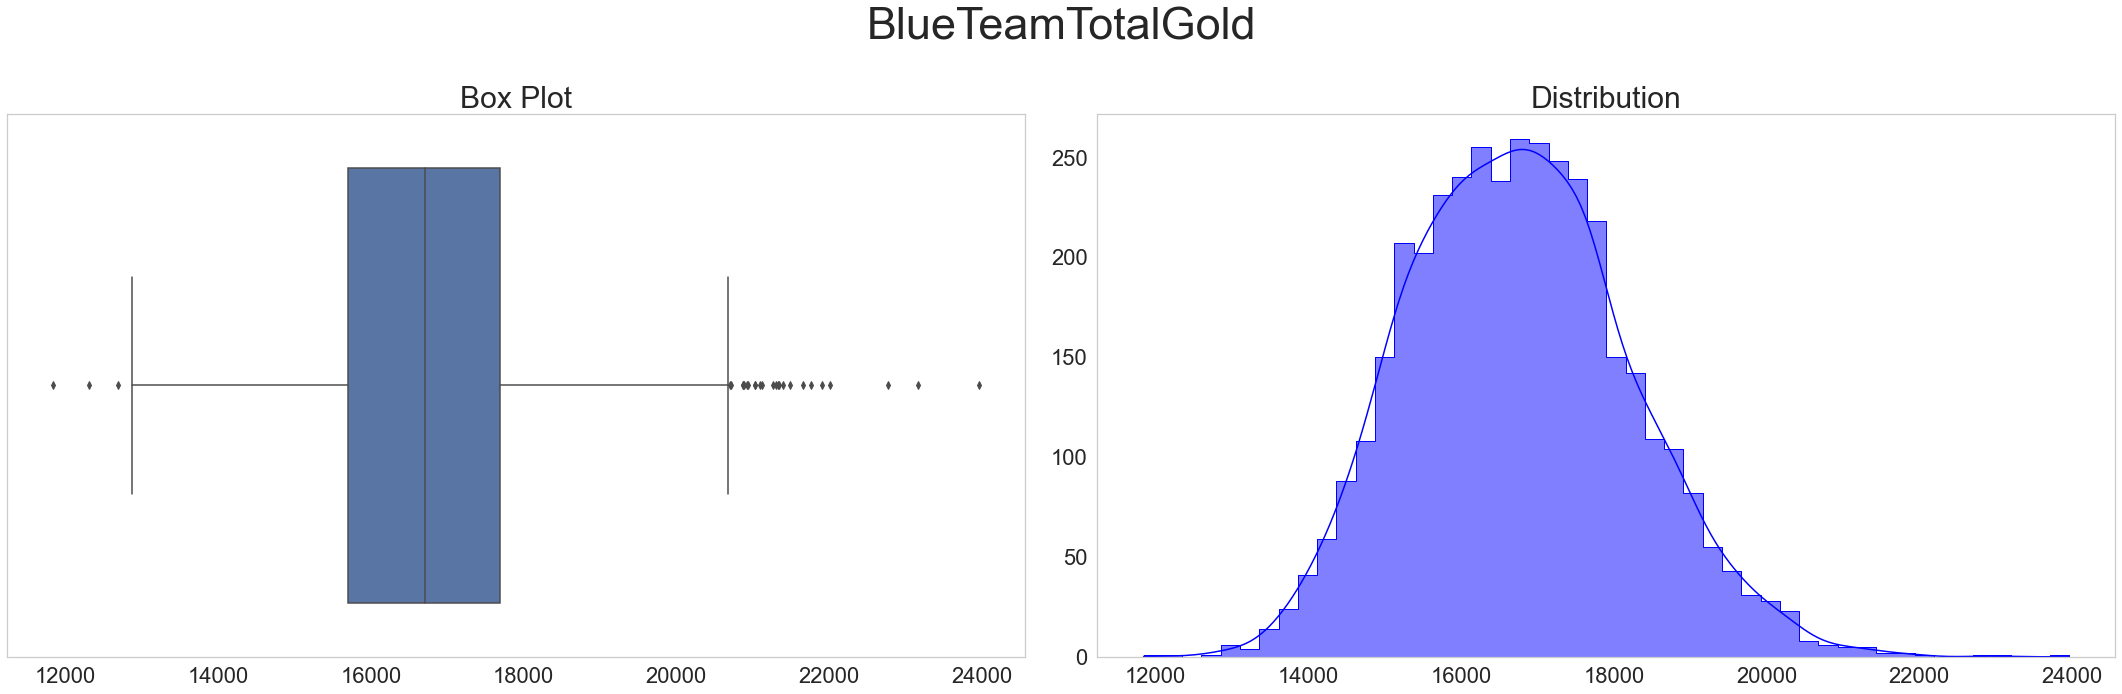

Summary Statistics for BlueTeamTotalGold
count     3890.000000
mean     16757.383548
std       1458.330670
min      11846.000000
25%      15704.250000
50%      16704.000000
75%      17694.000000
max      23960.000000
Name: BlueTeamTotalGold, dtype: float64


In [83]:
# univariate study
univariate_study = ['RedTeamTotalGold','BlueTeamTotalGold']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

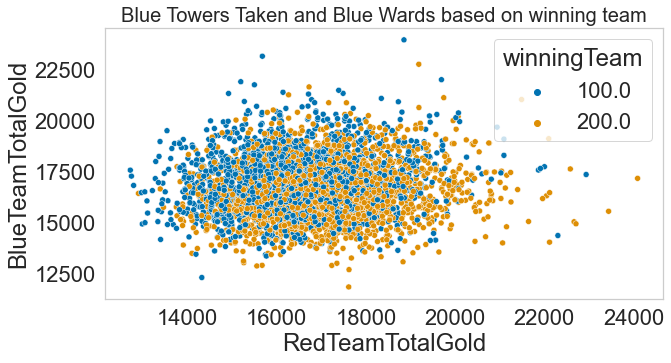

In [81]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='RedTeamTotalGold',y='BlueTeamTotalGold',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Towers Taken and Blue Wards based on winning team', fontsize = 20)
plt.show()

In [85]:
big_assists = train[train.RedTeamTotalGold > 16_700]
little_assists = train[train.BlueTeamTotalGold < 16_700]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

0.45086735195110883


- Wards may have a minor role, however the number of towers blue team won atleast 4 or more is a key factor in the outcome

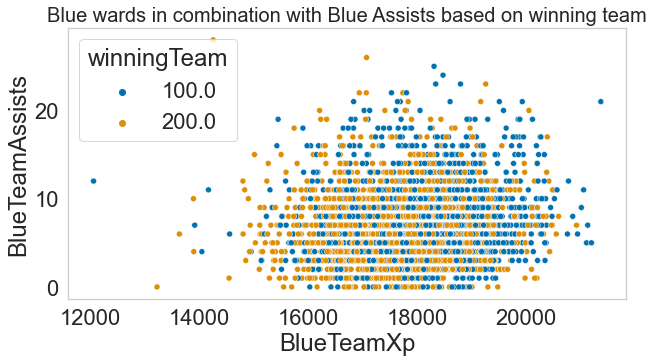

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamXp',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue wards in combination with Blue Assists based on winning team', fontsize = 20)
plt.show()

In [54]:
big_assists = train[train.BlueTeamWards > 1]
little_assists = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

0.6343223385507883


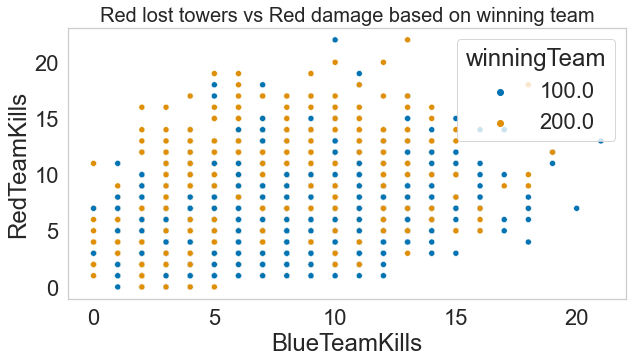

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamKills',y='RedTeamKills',data=train,hue='winningTeam', palette='colorblind')
plt.title('Red lost towers vs Red damage based on winning team', fontsize = 20)
plt.show()

In [56]:
big_assists = train[train.towers_lost_team200 > 0]
little_assists = train[train.RedTeamTrueDamageDoneToChampions > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

0.03567010951231841


- losing towers to blue team is more important then total damage by red team

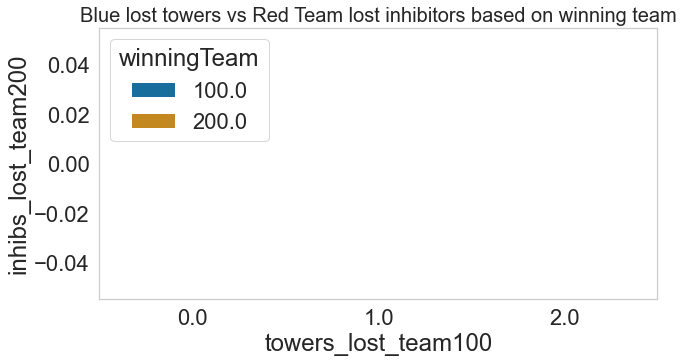

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='towers_lost_team100',y='inhibs_lost_team200',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue lost towers vs Red Team lost inhibitors based on winning team', fontsize = 20)
plt.show()

In [58]:
big_assists = train[train.towers_lost_team100 > 0]
little_assists = train[train.inhibs_lost_team200 > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

nan


- even if blue team lost towers, if red team lost 1 inhibitor the outcome is blue team winning

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
#validation & tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
cv=KFold(n_splits = 5, random_state=123,shuffle=True)

In [201]:
info_x=df.drop(['gameMode', 'gameType','gameVersion','matchId','gameName'],axis=1)
info_y=df.winningTeam

In [202]:
knn_params = {"n_neighbors" :np.arange(95,105),
             "weights" : ["distance"],
             "algorithm" : ["ball_tree"] , #,"kd_tree","brute"
             "leaf_size":[1,2]}

In [203]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params,cv=cv,verbose=2,n_jobs=-1)
grid_knn.fit(info_x,info_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [1, 2],
                         'n_neighbors': array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
                         'weights': ['distance']},
             verbose=2)

In [204]:
knn_best_params=grid_knn.best_params_
knn_best_params

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 104,
 'weights': 'distance'}

In [205]:
knn = KNeighborsClassifier(algorithm="ball_tree",n_neighbors=98,weights="distance",leaf_size=1)

In [206]:
np.mean(cross_val_score(knn,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.49927359699541957

In [207]:
cat_params = {"learning_rate":[0.005],
              "depth":[6,8]}

In [208]:
cat = CatBoostClassifier()

In [209]:
cat_grid = GridSearchCV(cat,cat_params,cv=cv)

In [210]:
cat_grid.fit(info_x,info_y)

0:	learn: 0.6780175	total: 15.8ms	remaining: 15.7s
1:	learn: 0.6616237	total: 24.1ms	remaining: 12s
2:	learn: 0.6464404	total: 32ms	remaining: 10.6s
3:	learn: 0.6291632	total: 39.4ms	remaining: 9.81s
4:	learn: 0.6141571	total: 46.9ms	remaining: 9.34s
5:	learn: 0.5985958	total: 55.1ms	remaining: 9.12s
6:	learn: 0.5833714	total: 62.8ms	remaining: 8.91s
7:	learn: 0.5695810	total: 70.3ms	remaining: 8.72s
8:	learn: 0.5546646	total: 77.9ms	remaining: 8.58s
9:	learn: 0.5414777	total: 85.3ms	remaining: 8.44s
10:	learn: 0.5278827	total: 93ms	remaining: 8.36s
11:	learn: 0.5162231	total: 100ms	remaining: 8.26s
12:	learn: 0.5045970	total: 108ms	remaining: 8.2s
13:	learn: 0.4919322	total: 116ms	remaining: 8.14s
14:	learn: 0.4802378	total: 123ms	remaining: 8.05s
15:	learn: 0.4686443	total: 130ms	remaining: 8.01s
16:	learn: 0.4595514	total: 138ms	remaining: 7.97s
17:	learn: 0.4495025	total: 146ms	remaining: 7.98s
18:	learn: 0.4389003	total: 156ms	remaining: 8.05s
19:	learn: 0.4285984	total: 164ms	rem

181:	learn: 0.0185174	total: 1.6s	remaining: 7.19s
182:	learn: 0.0183197	total: 1.61s	remaining: 7.19s
183:	learn: 0.0181091	total: 1.62s	remaining: 7.19s
184:	learn: 0.0178573	total: 1.63s	remaining: 7.18s
185:	learn: 0.0175493	total: 1.64s	remaining: 7.17s
186:	learn: 0.0172765	total: 1.65s	remaining: 7.16s
187:	learn: 0.0170238	total: 1.66s	remaining: 7.15s
188:	learn: 0.0167581	total: 1.67s	remaining: 7.14s
189:	learn: 0.0165595	total: 1.68s	remaining: 7.14s
190:	learn: 0.0162811	total: 1.69s	remaining: 7.14s
191:	learn: 0.0159951	total: 1.69s	remaining: 7.13s
192:	learn: 0.0157534	total: 1.7s	remaining: 7.12s
193:	learn: 0.0155368	total: 1.71s	remaining: 7.11s
194:	learn: 0.0153221	total: 1.72s	remaining: 7.11s
195:	learn: 0.0150975	total: 1.73s	remaining: 7.11s
196:	learn: 0.0149337	total: 1.74s	remaining: 7.1s
197:	learn: 0.0147556	total: 1.75s	remaining: 7.09s
198:	learn: 0.0145614	total: 1.76s	remaining: 7.08s
199:	learn: 0.0144003	total: 1.77s	remaining: 7.07s
200:	learn: 0.0

349:	learn: 0.0036875	total: 3.21s	remaining: 5.96s
350:	learn: 0.0036524	total: 3.22s	remaining: 5.96s
351:	learn: 0.0036263	total: 3.23s	remaining: 5.95s
352:	learn: 0.0036000	total: 3.24s	remaining: 5.94s
353:	learn: 0.0035814	total: 3.25s	remaining: 5.94s
354:	learn: 0.0035567	total: 3.26s	remaining: 5.93s
355:	learn: 0.0035374	total: 3.27s	remaining: 5.92s
356:	learn: 0.0035162	total: 3.28s	remaining: 5.92s
357:	learn: 0.0034963	total: 3.3s	remaining: 5.91s
358:	learn: 0.0034761	total: 3.31s	remaining: 5.91s
359:	learn: 0.0034575	total: 3.32s	remaining: 5.9s
360:	learn: 0.0034340	total: 3.33s	remaining: 5.9s
361:	learn: 0.0034147	total: 3.34s	remaining: 5.89s
362:	learn: 0.0033956	total: 3.35s	remaining: 5.89s
363:	learn: 0.0033723	total: 3.37s	remaining: 5.88s
364:	learn: 0.0033547	total: 3.38s	remaining: 5.88s
365:	learn: 0.0033329	total: 3.39s	remaining: 5.88s
366:	learn: 0.0033135	total: 3.4s	remaining: 5.87s
367:	learn: 0.0032816	total: 3.42s	remaining: 5.87s
368:	learn: 0.00

511:	learn: 0.0016231	total: 4.83s	remaining: 4.6s
512:	learn: 0.0016146	total: 4.84s	remaining: 4.59s
513:	learn: 0.0016073	total: 4.85s	remaining: 4.58s
514:	learn: 0.0016005	total: 4.86s	remaining: 4.58s
515:	learn: 0.0015959	total: 4.87s	remaining: 4.57s
516:	learn: 0.0015890	total: 4.88s	remaining: 4.56s
517:	learn: 0.0015806	total: 4.88s	remaining: 4.55s
518:	learn: 0.0015752	total: 4.89s	remaining: 4.54s
519:	learn: 0.0015701	total: 4.9s	remaining: 4.53s
520:	learn: 0.0015629	total: 4.91s	remaining: 4.51s
521:	learn: 0.0015590	total: 4.92s	remaining: 4.5s
522:	learn: 0.0015531	total: 4.93s	remaining: 4.49s
523:	learn: 0.0015493	total: 4.93s	remaining: 4.48s
524:	learn: 0.0015424	total: 4.94s	remaining: 4.47s
525:	learn: 0.0015378	total: 4.95s	remaining: 4.46s
526:	learn: 0.0015312	total: 4.96s	remaining: 4.45s
527:	learn: 0.0015247	total: 4.97s	remaining: 4.45s
528:	learn: 0.0015207	total: 4.98s	remaining: 4.44s
529:	learn: 0.0015157	total: 4.99s	remaining: 4.42s
530:	learn: 0.0

683:	learn: 0.0009679	total: 6.41s	remaining: 2.96s
684:	learn: 0.0009661	total: 6.42s	remaining: 2.95s
685:	learn: 0.0009624	total: 6.43s	remaining: 2.94s
686:	learn: 0.0009597	total: 6.44s	remaining: 2.93s
687:	learn: 0.0009561	total: 6.45s	remaining: 2.92s
688:	learn: 0.0009539	total: 6.46s	remaining: 2.91s
689:	learn: 0.0009517	total: 6.46s	remaining: 2.9s
690:	learn: 0.0009517	total: 6.47s	remaining: 2.89s
691:	learn: 0.0009494	total: 6.48s	remaining: 2.88s
692:	learn: 0.0009472	total: 6.49s	remaining: 2.87s
693:	learn: 0.0009455	total: 6.5s	remaining: 2.87s
694:	learn: 0.0009435	total: 6.51s	remaining: 2.85s
695:	learn: 0.0009414	total: 6.51s	remaining: 2.85s
696:	learn: 0.0009397	total: 6.52s	remaining: 2.84s
697:	learn: 0.0009375	total: 6.53s	remaining: 2.83s
698:	learn: 0.0009360	total: 6.54s	remaining: 2.82s
699:	learn: 0.0009342	total: 6.55s	remaining: 2.81s
700:	learn: 0.0009342	total: 6.56s	remaining: 2.8s
701:	learn: 0.0009308	total: 6.57s	remaining: 2.79s
702:	learn: 0.0

842:	learn: 0.0007538	total: 7.78s	remaining: 1.45s
843:	learn: 0.0007538	total: 7.79s	remaining: 1.44s
844:	learn: 0.0007538	total: 7.8s	remaining: 1.43s
845:	learn: 0.0007538	total: 7.81s	remaining: 1.42s
846:	learn: 0.0007538	total: 7.82s	remaining: 1.41s
847:	learn: 0.0007538	total: 7.83s	remaining: 1.4s
848:	learn: 0.0007537	total: 7.84s	remaining: 1.39s
849:	learn: 0.0007537	total: 7.85s	remaining: 1.38s
850:	learn: 0.0007517	total: 7.85s	remaining: 1.38s
851:	learn: 0.0007517	total: 7.86s	remaining: 1.36s
852:	learn: 0.0007495	total: 7.87s	remaining: 1.36s
853:	learn: 0.0007495	total: 7.88s	remaining: 1.35s
854:	learn: 0.0007495	total: 7.89s	remaining: 1.34s
855:	learn: 0.0007495	total: 7.89s	remaining: 1.33s
856:	learn: 0.0007495	total: 7.9s	remaining: 1.32s
857:	learn: 0.0007495	total: 7.91s	remaining: 1.31s
858:	learn: 0.0007495	total: 7.92s	remaining: 1.3s
859:	learn: 0.0007495	total: 7.93s	remaining: 1.29s
860:	learn: 0.0007495	total: 7.93s	remaining: 1.28s
861:	learn: 0.00

0:	learn: 0.6763451	total: 13.1ms	remaining: 13.1s
1:	learn: 0.6608785	total: 21.4ms	remaining: 10.7s
2:	learn: 0.6446814	total: 29.7ms	remaining: 9.88s
3:	learn: 0.6280329	total: 38.4ms	remaining: 9.55s
4:	learn: 0.6129559	total: 46.8ms	remaining: 9.31s
5:	learn: 0.5963098	total: 55.1ms	remaining: 9.12s
6:	learn: 0.5823422	total: 63.3ms	remaining: 8.98s
7:	learn: 0.5696357	total: 71.3ms	remaining: 8.84s
8:	learn: 0.5554505	total: 79.2ms	remaining: 8.72s
9:	learn: 0.5423609	total: 87.7ms	remaining: 8.69s
10:	learn: 0.5294324	total: 96ms	remaining: 8.63s
11:	learn: 0.5177289	total: 105ms	remaining: 8.64s
12:	learn: 0.5059231	total: 114ms	remaining: 8.66s
13:	learn: 0.4918642	total: 121ms	remaining: 8.56s
14:	learn: 0.4797593	total: 130ms	remaining: 8.52s
15:	learn: 0.4678334	total: 138ms	remaining: 8.52s
16:	learn: 0.4583635	total: 147ms	remaining: 8.48s
17:	learn: 0.4480962	total: 155ms	remaining: 8.45s
18:	learn: 0.4377898	total: 163ms	remaining: 8.41s
19:	learn: 0.4278554	total: 171m

181:	learn: 0.0177043	total: 1.6s	remaining: 7.19s
182:	learn: 0.0174584	total: 1.61s	remaining: 7.18s
183:	learn: 0.0172996	total: 1.62s	remaining: 7.19s
184:	learn: 0.0171419	total: 1.63s	remaining: 7.2s
185:	learn: 0.0169265	total: 1.65s	remaining: 7.2s
186:	learn: 0.0166669	total: 1.66s	remaining: 7.2s
187:	learn: 0.0164426	total: 1.66s	remaining: 7.19s
188:	learn: 0.0162691	total: 1.67s	remaining: 7.19s
189:	learn: 0.0160508	total: 1.68s	remaining: 7.18s
190:	learn: 0.0158431	total: 1.69s	remaining: 7.17s
191:	learn: 0.0155803	total: 1.7s	remaining: 7.17s
192:	learn: 0.0153904	total: 1.71s	remaining: 7.17s
193:	learn: 0.0151816	total: 1.72s	remaining: 7.16s
194:	learn: 0.0149592	total: 1.73s	remaining: 7.15s
195:	learn: 0.0147574	total: 1.74s	remaining: 7.15s
196:	learn: 0.0145852	total: 1.75s	remaining: 7.14s
197:	learn: 0.0144700	total: 1.76s	remaining: 7.14s
198:	learn: 0.0143424	total: 1.77s	remaining: 7.13s
199:	learn: 0.0141802	total: 1.78s	remaining: 7.13s
200:	learn: 0.013

351:	learn: 0.0034397	total: 3.43s	remaining: 6.31s
352:	learn: 0.0034103	total: 3.44s	remaining: 6.3s
353:	learn: 0.0033867	total: 3.45s	remaining: 6.3s
354:	learn: 0.0033693	total: 3.46s	remaining: 6.29s
355:	learn: 0.0033441	total: 3.47s	remaining: 6.28s
356:	learn: 0.0033243	total: 3.48s	remaining: 6.27s
357:	learn: 0.0032990	total: 3.49s	remaining: 6.26s
358:	learn: 0.0032723	total: 3.5s	remaining: 6.25s
359:	learn: 0.0032559	total: 3.51s	remaining: 6.24s
360:	learn: 0.0032304	total: 3.52s	remaining: 6.23s
361:	learn: 0.0032094	total: 3.53s	remaining: 6.22s
362:	learn: 0.0031956	total: 3.54s	remaining: 6.21s
363:	learn: 0.0031832	total: 3.54s	remaining: 6.19s
364:	learn: 0.0031644	total: 3.55s	remaining: 6.18s
365:	learn: 0.0031365	total: 3.56s	remaining: 6.17s
366:	learn: 0.0031105	total: 3.57s	remaining: 6.16s
367:	learn: 0.0030947	total: 3.58s	remaining: 6.15s
368:	learn: 0.0030730	total: 3.59s	remaining: 6.13s
369:	learn: 0.0030554	total: 3.6s	remaining: 6.12s
370:	learn: 0.00

512:	learn: 0.0015336	total: 4.83s	remaining: 4.59s
513:	learn: 0.0015299	total: 4.84s	remaining: 4.58s
514:	learn: 0.0015247	total: 4.85s	remaining: 4.57s
515:	learn: 0.0015215	total: 4.86s	remaining: 4.56s
516:	learn: 0.0015173	total: 4.87s	remaining: 4.55s
517:	learn: 0.0015146	total: 4.88s	remaining: 4.54s
518:	learn: 0.0015110	total: 4.89s	remaining: 4.53s
519:	learn: 0.0015062	total: 4.89s	remaining: 4.52s
520:	learn: 0.0014984	total: 4.9s	remaining: 4.51s
521:	learn: 0.0014925	total: 4.91s	remaining: 4.5s
522:	learn: 0.0014847	total: 4.92s	remaining: 4.49s
523:	learn: 0.0014778	total: 4.93s	remaining: 4.48s
524:	learn: 0.0014731	total: 4.94s	remaining: 4.47s
525:	learn: 0.0014682	total: 4.95s	remaining: 4.46s
526:	learn: 0.0014614	total: 4.95s	remaining: 4.45s
527:	learn: 0.0014567	total: 4.96s	remaining: 4.44s
528:	learn: 0.0014528	total: 4.97s	remaining: 4.42s
529:	learn: 0.0014460	total: 4.98s	remaining: 4.41s
530:	learn: 0.0014418	total: 4.99s	remaining: 4.4s
531:	learn: 0.0

674:	learn: 0.0009536	total: 6.23s	remaining: 3s
675:	learn: 0.0009505	total: 6.24s	remaining: 2.99s
676:	learn: 0.0009484	total: 6.25s	remaining: 2.98s
677:	learn: 0.0009462	total: 6.26s	remaining: 2.97s
678:	learn: 0.0009435	total: 6.27s	remaining: 2.96s
679:	learn: 0.0009435	total: 6.28s	remaining: 2.95s
680:	learn: 0.0009408	total: 6.29s	remaining: 2.94s
681:	learn: 0.0009408	total: 6.29s	remaining: 2.93s
682:	learn: 0.0009389	total: 6.3s	remaining: 2.92s
683:	learn: 0.0009368	total: 6.31s	remaining: 2.92s
684:	learn: 0.0009341	total: 6.32s	remaining: 2.9s
685:	learn: 0.0009341	total: 6.33s	remaining: 2.9s
686:	learn: 0.0009318	total: 6.33s	remaining: 2.89s
687:	learn: 0.0009318	total: 6.34s	remaining: 2.88s
688:	learn: 0.0009318	total: 6.35s	remaining: 2.87s
689:	learn: 0.0009294	total: 6.36s	remaining: 2.86s
690:	learn: 0.0009276	total: 6.37s	remaining: 2.85s
691:	learn: 0.0009246	total: 6.38s	remaining: 2.84s
692:	learn: 0.0009227	total: 6.38s	remaining: 2.83s
693:	learn: 0.0009

838:	learn: 0.0007410	total: 7.62s	remaining: 1.46s
839:	learn: 0.0007410	total: 7.63s	remaining: 1.45s
840:	learn: 0.0007379	total: 7.64s	remaining: 1.44s
841:	learn: 0.0007379	total: 7.65s	remaining: 1.43s
842:	learn: 0.0007359	total: 7.66s	remaining: 1.43s
843:	learn: 0.0007342	total: 7.66s	remaining: 1.42s
844:	learn: 0.0007342	total: 7.67s	remaining: 1.41s
845:	learn: 0.0007322	total: 7.68s	remaining: 1.4s
846:	learn: 0.0007300	total: 7.69s	remaining: 1.39s
847:	learn: 0.0007300	total: 7.7s	remaining: 1.38s
848:	learn: 0.0007284	total: 7.71s	remaining: 1.37s
849:	learn: 0.0007284	total: 7.71s	remaining: 1.36s
850:	learn: 0.0007284	total: 7.72s	remaining: 1.35s
851:	learn: 0.0007263	total: 7.73s	remaining: 1.34s
852:	learn: 0.0007263	total: 7.74s	remaining: 1.33s
853:	learn: 0.0007263	total: 7.75s	remaining: 1.32s
854:	learn: 0.0007263	total: 7.76s	remaining: 1.31s
855:	learn: 0.0007242	total: 7.76s	remaining: 1.31s
856:	learn: 0.0007242	total: 7.77s	remaining: 1.3s
857:	learn: 0.0

0:	learn: 0.6780388	total: 14.7ms	remaining: 14.7s
1:	learn: 0.6616186	total: 24.4ms	remaining: 12.2s
2:	learn: 0.6464611	total: 32.9ms	remaining: 10.9s
3:	learn: 0.6292180	total: 41.3ms	remaining: 10.3s
4:	learn: 0.6141630	total: 49.3ms	remaining: 9.82s
5:	learn: 0.5986271	total: 57.5ms	remaining: 9.53s
6:	learn: 0.5834985	total: 65.4ms	remaining: 9.28s
7:	learn: 0.5697947	total: 72.6ms	remaining: 9s
8:	learn: 0.5544105	total: 80.4ms	remaining: 8.85s
9:	learn: 0.5412358	total: 89.1ms	remaining: 8.82s
10:	learn: 0.5277353	total: 97.9ms	remaining: 8.8s
11:	learn: 0.5160781	total: 107ms	remaining: 8.83s
12:	learn: 0.5044185	total: 115ms	remaining: 8.71s
13:	learn: 0.4908445	total: 123ms	remaining: 8.69s
14:	learn: 0.4792508	total: 131ms	remaining: 8.59s
15:	learn: 0.4676833	total: 138ms	remaining: 8.51s
16:	learn: 0.4586079	total: 147ms	remaining: 8.48s
17:	learn: 0.4485054	total: 155ms	remaining: 8.43s
18:	learn: 0.4379248	total: 163ms	remaining: 8.4s
19:	learn: 0.4277247	total: 170ms	r

166:	learn: 0.0227585	total: 1.41s	remaining: 7.04s
167:	learn: 0.0223841	total: 1.42s	remaining: 7.04s
168:	learn: 0.0221121	total: 1.43s	remaining: 7.03s
169:	learn: 0.0217941	total: 1.44s	remaining: 7.03s
170:	learn: 0.0214865	total: 1.45s	remaining: 7.02s
171:	learn: 0.0212199	total: 1.46s	remaining: 7.01s
172:	learn: 0.0208401	total: 1.47s	remaining: 7s
173:	learn: 0.0205513	total: 1.47s	remaining: 7s
174:	learn: 0.0202716	total: 1.48s	remaining: 6.99s
175:	learn: 0.0200193	total: 1.49s	remaining: 6.98s
176:	learn: 0.0197659	total: 1.5s	remaining: 6.97s
177:	learn: 0.0194440	total: 1.51s	remaining: 6.96s
178:	learn: 0.0191858	total: 1.51s	remaining: 6.95s
179:	learn: 0.0190112	total: 1.52s	remaining: 6.94s
180:	learn: 0.0187685	total: 1.53s	remaining: 6.93s
181:	learn: 0.0184935	total: 1.54s	remaining: 6.92s
182:	learn: 0.0182538	total: 1.55s	remaining: 6.91s
183:	learn: 0.0180466	total: 1.56s	remaining: 6.9s
184:	learn: 0.0177970	total: 1.56s	remaining: 6.89s
185:	learn: 0.017509

329:	learn: 0.0042031	total: 2.81s	remaining: 5.7s
330:	learn: 0.0041801	total: 2.82s	remaining: 5.69s
331:	learn: 0.0041451	total: 2.83s	remaining: 5.69s
332:	learn: 0.0041139	total: 2.83s	remaining: 5.68s
333:	learn: 0.0040788	total: 2.84s	remaining: 5.67s
334:	learn: 0.0040575	total: 2.85s	remaining: 5.66s
335:	learn: 0.0040343	total: 2.86s	remaining: 5.65s
336:	learn: 0.0039948	total: 2.87s	remaining: 5.64s
337:	learn: 0.0039648	total: 2.88s	remaining: 5.63s
338:	learn: 0.0039481	total: 2.88s	remaining: 5.63s
339:	learn: 0.0039137	total: 2.89s	remaining: 5.62s
340:	learn: 0.0038856	total: 2.9s	remaining: 5.61s
341:	learn: 0.0038511	total: 2.91s	remaining: 5.6s
342:	learn: 0.0038221	total: 2.92s	remaining: 5.59s
343:	learn: 0.0037934	total: 2.93s	remaining: 5.58s
344:	learn: 0.0037642	total: 2.93s	remaining: 5.57s
345:	learn: 0.0037419	total: 2.94s	remaining: 5.56s
346:	learn: 0.0037239	total: 2.95s	remaining: 5.55s
347:	learn: 0.0037040	total: 2.96s	remaining: 5.54s
348:	learn: 0.0

490:	learn: 0.0017214	total: 4.18s	remaining: 4.33s
491:	learn: 0.0017129	total: 4.19s	remaining: 4.32s
492:	learn: 0.0017055	total: 4.2s	remaining: 4.32s
493:	learn: 0.0017009	total: 4.21s	remaining: 4.31s
494:	learn: 0.0016964	total: 4.21s	remaining: 4.3s
495:	learn: 0.0016914	total: 4.22s	remaining: 4.29s
496:	learn: 0.0016848	total: 4.23s	remaining: 4.28s
497:	learn: 0.0016773	total: 4.24s	remaining: 4.27s
498:	learn: 0.0016681	total: 4.25s	remaining: 4.26s
499:	learn: 0.0016597	total: 4.26s	remaining: 4.26s
500:	learn: 0.0016524	total: 4.26s	remaining: 4.25s
501:	learn: 0.0016463	total: 4.27s	remaining: 4.24s
502:	learn: 0.0016401	total: 4.28s	remaining: 4.23s
503:	learn: 0.0016361	total: 4.29s	remaining: 4.22s
504:	learn: 0.0016283	total: 4.3s	remaining: 4.21s
505:	learn: 0.0016200	total: 4.3s	remaining: 4.2s
506:	learn: 0.0016156	total: 4.31s	remaining: 4.19s
507:	learn: 0.0016092	total: 4.32s	remaining: 4.18s
508:	learn: 0.0016018	total: 4.33s	remaining: 4.17s
509:	learn: 0.001

652:	learn: 0.0010238	total: 5.57s	remaining: 2.96s
653:	learn: 0.0010211	total: 5.58s	remaining: 2.95s
654:	learn: 0.0010182	total: 5.59s	remaining: 2.95s
655:	learn: 0.0010164	total: 5.6s	remaining: 2.94s
656:	learn: 0.0010132	total: 5.61s	remaining: 2.93s
657:	learn: 0.0010101	total: 5.62s	remaining: 2.92s
658:	learn: 0.0010077	total: 5.63s	remaining: 2.91s
659:	learn: 0.0010037	total: 5.64s	remaining: 2.9s
660:	learn: 0.0010010	total: 5.64s	remaining: 2.89s
661:	learn: 0.0009977	total: 5.65s	remaining: 2.88s
662:	learn: 0.0009959	total: 5.66s	remaining: 2.88s
663:	learn: 0.0009938	total: 5.67s	remaining: 2.87s
664:	learn: 0.0009915	total: 5.68s	remaining: 2.86s
665:	learn: 0.0009883	total: 5.68s	remaining: 2.85s
666:	learn: 0.0009852	total: 5.69s	remaining: 2.84s
667:	learn: 0.0009832	total: 5.7s	remaining: 2.83s
668:	learn: 0.0009799	total: 5.71s	remaining: 2.82s
669:	learn: 0.0009775	total: 5.72s	remaining: 2.81s
670:	learn: 0.0009753	total: 5.72s	remaining: 2.81s
671:	learn: 0.0

811:	learn: 0.0007725	total: 6.97s	remaining: 1.61s
812:	learn: 0.0007707	total: 6.98s	remaining: 1.6s
813:	learn: 0.0007685	total: 6.99s	remaining: 1.6s
814:	learn: 0.0007685	total: 7s	remaining: 1.59s
815:	learn: 0.0007685	total: 7.01s	remaining: 1.58s
816:	learn: 0.0007666	total: 7.01s	remaining: 1.57s
817:	learn: 0.0007666	total: 7.02s	remaining: 1.56s
818:	learn: 0.0007643	total: 7.03s	remaining: 1.55s
819:	learn: 0.0007643	total: 7.04s	remaining: 1.54s
820:	learn: 0.0007628	total: 7.05s	remaining: 1.54s
821:	learn: 0.0007606	total: 7.06s	remaining: 1.53s
822:	learn: 0.0007586	total: 7.06s	remaining: 1.52s
823:	learn: 0.0007586	total: 7.07s	remaining: 1.51s
824:	learn: 0.0007563	total: 7.08s	remaining: 1.5s
825:	learn: 0.0007543	total: 7.09s	remaining: 1.49s
826:	learn: 0.0007530	total: 7.1s	remaining: 1.48s
827:	learn: 0.0007530	total: 7.1s	remaining: 1.48s
828:	learn: 0.0007530	total: 7.11s	remaining: 1.47s
829:	learn: 0.0007530	total: 7.12s	remaining: 1.46s
830:	learn: 0.000753

972:	learn: 0.0007073	total: 8.36s	remaining: 232ms
973:	learn: 0.0007073	total: 8.37s	remaining: 223ms
974:	learn: 0.0007073	total: 8.38s	remaining: 215ms
975:	learn: 0.0007073	total: 8.39s	remaining: 206ms
976:	learn: 0.0007073	total: 8.4s	remaining: 198ms
977:	learn: 0.0007057	total: 8.4s	remaining: 189ms
978:	learn: 0.0007057	total: 8.41s	remaining: 180ms
979:	learn: 0.0007057	total: 8.42s	remaining: 172ms
980:	learn: 0.0007057	total: 8.43s	remaining: 163ms
981:	learn: 0.0007057	total: 8.44s	remaining: 155ms
982:	learn: 0.0007057	total: 8.45s	remaining: 146ms
983:	learn: 0.0007057	total: 8.46s	remaining: 138ms
984:	learn: 0.0007057	total: 8.46s	remaining: 129ms
985:	learn: 0.0007057	total: 8.47s	remaining: 120ms
986:	learn: 0.0007057	total: 8.48s	remaining: 112ms
987:	learn: 0.0007057	total: 8.49s	remaining: 103ms
988:	learn: 0.0007057	total: 8.5s	remaining: 94.5ms
989:	learn: 0.0007057	total: 8.51s	remaining: 85.9ms
990:	learn: 0.0007057	total: 8.51s	remaining: 77.3ms
991:	learn: 

152:	learn: 0.0285042	total: 1.3s	remaining: 7.2s
153:	learn: 0.0279715	total: 1.31s	remaining: 7.2s
154:	learn: 0.0275667	total: 1.32s	remaining: 7.19s
155:	learn: 0.0270369	total: 1.33s	remaining: 7.18s
156:	learn: 0.0266547	total: 1.34s	remaining: 7.18s
157:	learn: 0.0262389	total: 1.34s	remaining: 7.17s
158:	learn: 0.0259594	total: 1.35s	remaining: 7.16s
159:	learn: 0.0254962	total: 1.36s	remaining: 7.15s
160:	learn: 0.0251843	total: 1.37s	remaining: 7.14s
161:	learn: 0.0247933	total: 1.38s	remaining: 7.13s
162:	learn: 0.0243721	total: 1.39s	remaining: 7.13s
163:	learn: 0.0240248	total: 1.4s	remaining: 7.12s
164:	learn: 0.0236564	total: 1.4s	remaining: 7.11s
165:	learn: 0.0233590	total: 1.41s	remaining: 7.1s
166:	learn: 0.0229995	total: 1.42s	remaining: 7.08s
167:	learn: 0.0227142	total: 1.43s	remaining: 7.07s
168:	learn: 0.0224054	total: 1.44s	remaining: 7.07s
169:	learn: 0.0220498	total: 1.45s	remaining: 7.06s
170:	learn: 0.0217623	total: 1.45s	remaining: 7.05s
171:	learn: 0.0214

316:	learn: 0.0045220	total: 2.7s	remaining: 5.81s
317:	learn: 0.0044876	total: 2.71s	remaining: 5.8s
318:	learn: 0.0044677	total: 2.72s	remaining: 5.8s
319:	learn: 0.0044387	total: 2.73s	remaining: 5.79s
320:	learn: 0.0044052	total: 2.73s	remaining: 5.79s
321:	learn: 0.0043755	total: 2.74s	remaining: 5.78s
322:	learn: 0.0043399	total: 2.75s	remaining: 5.76s
323:	learn: 0.0043006	total: 2.76s	remaining: 5.76s
324:	learn: 0.0042740	total: 2.77s	remaining: 5.75s
325:	learn: 0.0042472	total: 2.78s	remaining: 5.74s
326:	learn: 0.0042183	total: 2.78s	remaining: 5.73s
327:	learn: 0.0041925	total: 2.79s	remaining: 5.72s
328:	learn: 0.0041577	total: 2.8s	remaining: 5.71s
329:	learn: 0.0041266	total: 2.81s	remaining: 5.7s
330:	learn: 0.0041006	total: 2.82s	remaining: 5.7s
331:	learn: 0.0040746	total: 2.83s	remaining: 5.69s
332:	learn: 0.0040484	total: 2.83s	remaining: 5.68s
333:	learn: 0.0040282	total: 2.84s	remaining: 5.67s
334:	learn: 0.0040086	total: 2.85s	remaining: 5.66s
335:	learn: 0.0039

479:	learn: 0.0018684	total: 4.1s	remaining: 4.44s
480:	learn: 0.0018614	total: 4.11s	remaining: 4.43s
481:	learn: 0.0018520	total: 4.12s	remaining: 4.42s
482:	learn: 0.0018436	total: 4.13s	remaining: 4.42s
483:	learn: 0.0018356	total: 4.14s	remaining: 4.41s
484:	learn: 0.0018265	total: 4.14s	remaining: 4.4s
485:	learn: 0.0018209	total: 4.15s	remaining: 4.39s
486:	learn: 0.0018116	total: 4.16s	remaining: 4.38s
487:	learn: 0.0018024	total: 4.17s	remaining: 4.38s
488:	learn: 0.0017972	total: 4.18s	remaining: 4.37s
489:	learn: 0.0017922	total: 4.19s	remaining: 4.36s
490:	learn: 0.0017854	total: 4.2s	remaining: 4.35s
491:	learn: 0.0017799	total: 4.21s	remaining: 4.34s
492:	learn: 0.0017739	total: 4.21s	remaining: 4.33s
493:	learn: 0.0017693	total: 4.22s	remaining: 4.32s
494:	learn: 0.0017643	total: 4.23s	remaining: 4.32s
495:	learn: 0.0017560	total: 4.24s	remaining: 4.31s
496:	learn: 0.0017511	total: 4.25s	remaining: 4.3s
497:	learn: 0.0017421	total: 4.26s	remaining: 4.29s
498:	learn: 0.00

641:	learn: 0.0010989	total: 5.5s	remaining: 3.06s
642:	learn: 0.0010963	total: 5.51s	remaining: 3.06s
643:	learn: 0.0010923	total: 5.52s	remaining: 3.05s
644:	learn: 0.0010900	total: 5.53s	remaining: 3.04s
645:	learn: 0.0010868	total: 5.54s	remaining: 3.03s
646:	learn: 0.0010842	total: 5.54s	remaining: 3.02s
647:	learn: 0.0010813	total: 5.55s	remaining: 3.02s
648:	learn: 0.0010773	total: 5.56s	remaining: 3.01s
649:	learn: 0.0010751	total: 5.57s	remaining: 3s
650:	learn: 0.0010723	total: 5.58s	remaining: 2.99s
651:	learn: 0.0010702	total: 5.59s	remaining: 2.98s
652:	learn: 0.0010681	total: 5.59s	remaining: 2.97s
653:	learn: 0.0010651	total: 5.6s	remaining: 2.96s
654:	learn: 0.0010600	total: 5.61s	remaining: 2.96s
655:	learn: 0.0010565	total: 5.62s	remaining: 2.95s
656:	learn: 0.0010535	total: 5.63s	remaining: 2.94s
657:	learn: 0.0010516	total: 5.64s	remaining: 2.93s
658:	learn: 0.0010481	total: 5.64s	remaining: 2.92s
659:	learn: 0.0010458	total: 5.65s	remaining: 2.91s
660:	learn: 0.001

803:	learn: 0.0008147	total: 6.89s	remaining: 1.68s
804:	learn: 0.0008126	total: 6.9s	remaining: 1.67s
805:	learn: 0.0008109	total: 6.91s	remaining: 1.66s
806:	learn: 0.0008088	total: 6.92s	remaining: 1.66s
807:	learn: 0.0008088	total: 6.93s	remaining: 1.65s
808:	learn: 0.0008088	total: 6.94s	remaining: 1.64s
809:	learn: 0.0008088	total: 6.95s	remaining: 1.63s
810:	learn: 0.0008088	total: 6.96s	remaining: 1.62s
811:	learn: 0.0008088	total: 6.96s	remaining: 1.61s
812:	learn: 0.0008071	total: 6.97s	remaining: 1.6s
813:	learn: 0.0008071	total: 6.98s	remaining: 1.59s
814:	learn: 0.0008071	total: 6.99s	remaining: 1.59s
815:	learn: 0.0008071	total: 7s	remaining: 1.58s
816:	learn: 0.0008052	total: 7.01s	remaining: 1.57s
817:	learn: 0.0008052	total: 7.01s	remaining: 1.56s
818:	learn: 0.0008035	total: 7.02s	remaining: 1.55s
819:	learn: 0.0008035	total: 7.03s	remaining: 1.54s
820:	learn: 0.0008035	total: 7.04s	remaining: 1.53s
821:	learn: 0.0008012	total: 7.05s	remaining: 1.53s
822:	learn: 0.000

966:	learn: 0.0007370	total: 8.29s	remaining: 283ms
967:	learn: 0.0007370	total: 8.3s	remaining: 274ms
968:	learn: 0.0007370	total: 8.31s	remaining: 266ms
969:	learn: 0.0007370	total: 8.32s	remaining: 257ms
970:	learn: 0.0007352	total: 8.33s	remaining: 249ms
971:	learn: 0.0007330	total: 8.34s	remaining: 240ms
972:	learn: 0.0007330	total: 8.35s	remaining: 232ms
973:	learn: 0.0007312	total: 8.35s	remaining: 223ms
974:	learn: 0.0007312	total: 8.36s	remaining: 214ms
975:	learn: 0.0007311	total: 8.37s	remaining: 206ms
976:	learn: 0.0007312	total: 8.38s	remaining: 197ms
977:	learn: 0.0007291	total: 8.39s	remaining: 189ms
978:	learn: 0.0007291	total: 8.39s	remaining: 180ms
979:	learn: 0.0007291	total: 8.4s	remaining: 171ms
980:	learn: 0.0007270	total: 8.41s	remaining: 163ms
981:	learn: 0.0007270	total: 8.42s	remaining: 154ms
982:	learn: 0.0007270	total: 8.43s	remaining: 146ms
983:	learn: 0.0007270	total: 8.43s	remaining: 137ms
984:	learn: 0.0007270	total: 8.44s	remaining: 129ms
985:	learn: 0.

126:	learn: 0.0449471	total: 1.08s	remaining: 7.46s
127:	learn: 0.0440361	total: 1.1s	remaining: 7.47s
128:	learn: 0.0432155	total: 1.11s	remaining: 7.47s
129:	learn: 0.0424394	total: 1.11s	remaining: 7.46s
130:	learn: 0.0417681	total: 1.12s	remaining: 7.46s
131:	learn: 0.0411437	total: 1.13s	remaining: 7.45s
132:	learn: 0.0403012	total: 1.14s	remaining: 7.44s
133:	learn: 0.0395962	total: 1.15s	remaining: 7.43s
134:	learn: 0.0389622	total: 1.16s	remaining: 7.43s
135:	learn: 0.0382576	total: 1.17s	remaining: 7.42s
136:	learn: 0.0376565	total: 1.18s	remaining: 7.4s
137:	learn: 0.0369578	total: 1.18s	remaining: 7.39s
138:	learn: 0.0362831	total: 1.19s	remaining: 7.38s
139:	learn: 0.0357011	total: 1.2s	remaining: 7.38s
140:	learn: 0.0350489	total: 1.21s	remaining: 7.37s
141:	learn: 0.0343171	total: 1.22s	remaining: 7.36s
142:	learn: 0.0339336	total: 1.23s	remaining: 7.35s
143:	learn: 0.0333779	total: 1.23s	remaining: 7.33s
144:	learn: 0.0328060	total: 1.24s	remaining: 7.33s
145:	learn: 0.0

288:	learn: 0.0057970	total: 2.48s	remaining: 6.11s
289:	learn: 0.0057364	total: 2.49s	remaining: 6.11s
290:	learn: 0.0056747	total: 2.5s	remaining: 6.11s
291:	learn: 0.0056298	total: 2.52s	remaining: 6.1s
292:	learn: 0.0055968	total: 2.52s	remaining: 6.09s
293:	learn: 0.0055540	total: 2.53s	remaining: 6.08s
294:	learn: 0.0055083	total: 2.54s	remaining: 6.07s
295:	learn: 0.0054670	total: 2.55s	remaining: 6.06s
296:	learn: 0.0054059	total: 2.56s	remaining: 6.05s
297:	learn: 0.0053600	total: 2.57s	remaining: 6.04s
298:	learn: 0.0053306	total: 2.57s	remaining: 6.04s
299:	learn: 0.0052799	total: 2.58s	remaining: 6.03s
300:	learn: 0.0052457	total: 2.59s	remaining: 6.02s
301:	learn: 0.0052033	total: 2.6s	remaining: 6.01s
302:	learn: 0.0051666	total: 2.61s	remaining: 6s
303:	learn: 0.0051265	total: 2.62s	remaining: 5.99s
304:	learn: 0.0050917	total: 2.63s	remaining: 5.98s
305:	learn: 0.0050585	total: 2.63s	remaining: 5.97s
306:	learn: 0.0050227	total: 2.64s	remaining: 5.97s
307:	learn: 0.0049

450:	learn: 0.0020886	total: 3.88s	remaining: 4.72s
451:	learn: 0.0020808	total: 3.89s	remaining: 4.71s
452:	learn: 0.0020758	total: 3.9s	remaining: 4.71s
453:	learn: 0.0020662	total: 3.91s	remaining: 4.7s
454:	learn: 0.0020562	total: 3.92s	remaining: 4.69s
455:	learn: 0.0020460	total: 3.93s	remaining: 4.68s
456:	learn: 0.0020302	total: 3.93s	remaining: 4.67s
457:	learn: 0.0020247	total: 3.94s	remaining: 4.67s
458:	learn: 0.0020174	total: 3.95s	remaining: 4.66s
459:	learn: 0.0020102	total: 3.96s	remaining: 4.65s
460:	learn: 0.0019999	total: 3.97s	remaining: 4.64s
461:	learn: 0.0019894	total: 3.98s	remaining: 4.63s
462:	learn: 0.0019817	total: 3.98s	remaining: 4.62s
463:	learn: 0.0019715	total: 3.99s	remaining: 4.61s
464:	learn: 0.0019658	total: 4s	remaining: 4.61s
465:	learn: 0.0019562	total: 4.01s	remaining: 4.6s
466:	learn: 0.0019474	total: 4.02s	remaining: 4.59s
467:	learn: 0.0019384	total: 4.03s	remaining: 4.58s
468:	learn: 0.0019317	total: 4.04s	remaining: 4.57s
469:	learn: 0.0019

613:	learn: 0.0011511	total: 5.27s	remaining: 3.31s
614:	learn: 0.0011470	total: 5.28s	remaining: 3.31s
615:	learn: 0.0011422	total: 5.29s	remaining: 3.3s
616:	learn: 0.0011367	total: 5.3s	remaining: 3.29s
617:	learn: 0.0011340	total: 5.31s	remaining: 3.28s
618:	learn: 0.0011320	total: 5.32s	remaining: 3.27s
619:	learn: 0.0011278	total: 5.33s	remaining: 3.27s
620:	learn: 0.0011246	total: 5.34s	remaining: 3.26s
621:	learn: 0.0011217	total: 5.34s	remaining: 3.25s
622:	learn: 0.0011194	total: 5.35s	remaining: 3.24s
623:	learn: 0.0011174	total: 5.36s	remaining: 3.23s
624:	learn: 0.0011143	total: 5.37s	remaining: 3.22s
625:	learn: 0.0011094	total: 5.38s	remaining: 3.21s
626:	learn: 0.0011059	total: 5.39s	remaining: 3.21s
627:	learn: 0.0011018	total: 5.4s	remaining: 3.2s
628:	learn: 0.0010995	total: 5.41s	remaining: 3.19s
629:	learn: 0.0010969	total: 5.42s	remaining: 3.18s
630:	learn: 0.0010943	total: 5.42s	remaining: 3.17s
631:	learn: 0.0010913	total: 5.43s	remaining: 3.16s
632:	learn: 0.00

773:	learn: 0.0008087	total: 6.65s	remaining: 1.94s
774:	learn: 0.0008069	total: 6.66s	remaining: 1.93s
775:	learn: 0.0008050	total: 6.67s	remaining: 1.93s
776:	learn: 0.0008030	total: 6.68s	remaining: 1.92s
777:	learn: 0.0008013	total: 6.69s	remaining: 1.91s
778:	learn: 0.0007994	total: 6.7s	remaining: 1.9s
779:	learn: 0.0007975	total: 6.71s	remaining: 1.89s
780:	learn: 0.0007975	total: 6.71s	remaining: 1.88s
781:	learn: 0.0007975	total: 6.72s	remaining: 1.87s
782:	learn: 0.0007964	total: 6.73s	remaining: 1.86s
783:	learn: 0.0007950	total: 6.74s	remaining: 1.86s
784:	learn: 0.0007934	total: 6.75s	remaining: 1.85s
785:	learn: 0.0007934	total: 6.75s	remaining: 1.84s
786:	learn: 0.0007934	total: 6.76s	remaining: 1.83s
787:	learn: 0.0007918	total: 6.77s	remaining: 1.82s
788:	learn: 0.0007901	total: 6.78s	remaining: 1.81s
789:	learn: 0.0007885	total: 6.79s	remaining: 1.8s
790:	learn: 0.0007885	total: 6.79s	remaining: 1.79s
791:	learn: 0.0007885	total: 6.8s	remaining: 1.79s
792:	learn: 0.00

939:	learn: 0.0007117	total: 8.06s	remaining: 514ms
940:	learn: 0.0007117	total: 8.07s	remaining: 506ms
941:	learn: 0.0007117	total: 8.08s	remaining: 498ms
942:	learn: 0.0007097	total: 8.09s	remaining: 489ms
943:	learn: 0.0007097	total: 8.1s	remaining: 480ms
944:	learn: 0.0007097	total: 8.11s	remaining: 472ms
945:	learn: 0.0007097	total: 8.12s	remaining: 463ms
946:	learn: 0.0007067	total: 8.12s	remaining: 454ms
947:	learn: 0.0007067	total: 8.13s	remaining: 446ms
948:	learn: 0.0007067	total: 8.14s	remaining: 437ms
949:	learn: 0.0007067	total: 8.14s	remaining: 429ms
950:	learn: 0.0007067	total: 8.15s	remaining: 420ms
951:	learn: 0.0007067	total: 8.16s	remaining: 412ms
952:	learn: 0.0007067	total: 8.17s	remaining: 403ms
953:	learn: 0.0007067	total: 8.18s	remaining: 394ms
954:	learn: 0.0007067	total: 8.19s	remaining: 386ms
955:	learn: 0.0007045	total: 8.2s	remaining: 377ms
956:	learn: 0.0007045	total: 8.2s	remaining: 369ms
957:	learn: 0.0007045	total: 8.21s	remaining: 360ms
958:	learn: 0.0

100:	learn: 0.0925206	total: 2.54s	remaining: 22.6s
101:	learn: 0.0907004	total: 2.56s	remaining: 22.6s
102:	learn: 0.0891400	total: 2.59s	remaining: 22.5s
103:	learn: 0.0872642	total: 2.61s	remaining: 22.5s
104:	learn: 0.0857238	total: 2.64s	remaining: 22.5s
105:	learn: 0.0844927	total: 2.66s	remaining: 22.5s
106:	learn: 0.0830660	total: 2.69s	remaining: 22.4s
107:	learn: 0.0814762	total: 2.71s	remaining: 22.4s
108:	learn: 0.0804981	total: 2.74s	remaining: 22.4s
109:	learn: 0.0791062	total: 2.77s	remaining: 22.4s
110:	learn: 0.0779363	total: 2.79s	remaining: 22.4s
111:	learn: 0.0766999	total: 2.82s	remaining: 22.3s
112:	learn: 0.0755595	total: 2.84s	remaining: 22.3s
113:	learn: 0.0741266	total: 2.86s	remaining: 22.3s
114:	learn: 0.0726383	total: 2.89s	remaining: 22.2s
115:	learn: 0.0713644	total: 2.91s	remaining: 22.2s
116:	learn: 0.0699845	total: 2.94s	remaining: 22.2s
117:	learn: 0.0688330	total: 2.97s	remaining: 22.2s
118:	learn: 0.0676095	total: 2.99s	remaining: 22.2s
119:	learn: 

261:	learn: 0.0118327	total: 6.61s	remaining: 18.6s
262:	learn: 0.0117150	total: 6.63s	remaining: 18.6s
263:	learn: 0.0116573	total: 6.66s	remaining: 18.6s
264:	learn: 0.0115421	total: 6.69s	remaining: 18.5s
265:	learn: 0.0114746	total: 6.71s	remaining: 18.5s
266:	learn: 0.0113396	total: 6.74s	remaining: 18.5s
267:	learn: 0.0111936	total: 6.76s	remaining: 18.5s
268:	learn: 0.0110687	total: 6.79s	remaining: 18.4s
269:	learn: 0.0109627	total: 6.81s	remaining: 18.4s
270:	learn: 0.0108732	total: 6.84s	remaining: 18.4s
271:	learn: 0.0108225	total: 6.87s	remaining: 18.4s
272:	learn: 0.0107387	total: 6.89s	remaining: 18.4s
273:	learn: 0.0106698	total: 6.92s	remaining: 18.3s
274:	learn: 0.0105783	total: 6.94s	remaining: 18.3s
275:	learn: 0.0104983	total: 6.97s	remaining: 18.3s
276:	learn: 0.0103920	total: 6.99s	remaining: 18.2s
277:	learn: 0.0102839	total: 7.02s	remaining: 18.2s
278:	learn: 0.0101915	total: 7.05s	remaining: 18.2s
279:	learn: 0.0101331	total: 7.07s	remaining: 18.2s
280:	learn: 

424:	learn: 0.0039676	total: 10.7s	remaining: 14.5s
425:	learn: 0.0039495	total: 10.8s	remaining: 14.5s
426:	learn: 0.0039365	total: 10.8s	remaining: 14.5s
427:	learn: 0.0039195	total: 10.8s	remaining: 14.4s
428:	learn: 0.0038971	total: 10.8s	remaining: 14.4s
429:	learn: 0.0038801	total: 10.9s	remaining: 14.4s
430:	learn: 0.0038654	total: 10.9s	remaining: 14.4s
431:	learn: 0.0038441	total: 10.9s	remaining: 14.3s
432:	learn: 0.0038279	total: 10.9s	remaining: 14.3s
433:	learn: 0.0038146	total: 11s	remaining: 14.3s
434:	learn: 0.0037981	total: 11s	remaining: 14.3s
435:	learn: 0.0037736	total: 11s	remaining: 14.2s
436:	learn: 0.0037607	total: 11s	remaining: 14.2s
437:	learn: 0.0037439	total: 11s	remaining: 14.2s
438:	learn: 0.0037285	total: 11.1s	remaining: 14.1s
439:	learn: 0.0037113	total: 11.1s	remaining: 14.1s
440:	learn: 0.0036916	total: 11.1s	remaining: 14.1s
441:	learn: 0.0036763	total: 11.2s	remaining: 14.1s
442:	learn: 0.0036575	total: 11.2s	remaining: 14.1s
443:	learn: 0.0036363	

589:	learn: 0.0021847	total: 14.9s	remaining: 10.3s
590:	learn: 0.0021774	total: 14.9s	remaining: 10.3s
591:	learn: 0.0021724	total: 14.9s	remaining: 10.3s
592:	learn: 0.0021636	total: 15s	remaining: 10.3s
593:	learn: 0.0021571	total: 15s	remaining: 10.2s
594:	learn: 0.0021523	total: 15s	remaining: 10.2s
595:	learn: 0.0021456	total: 15s	remaining: 10.2s
596:	learn: 0.0021372	total: 15.1s	remaining: 10.2s
597:	learn: 0.0021348	total: 15.1s	remaining: 10.1s
598:	learn: 0.0021273	total: 15.1s	remaining: 10.1s
599:	learn: 0.0021211	total: 15.1s	remaining: 10.1s
600:	learn: 0.0021138	total: 15.2s	remaining: 10.1s
601:	learn: 0.0021102	total: 15.2s	remaining: 10s
602:	learn: 0.0021042	total: 15.2s	remaining: 10s
603:	learn: 0.0020977	total: 15.2s	remaining: 9.99s
604:	learn: 0.0020944	total: 15.3s	remaining: 9.96s
605:	learn: 0.0020872	total: 15.3s	remaining: 9.94s
606:	learn: 0.0020835	total: 15.3s	remaining: 9.92s
607:	learn: 0.0020780	total: 15.3s	remaining: 9.89s
608:	learn: 0.0020748	to

750:	learn: 0.0015110	total: 19s	remaining: 6.3s
751:	learn: 0.0015080	total: 19s	remaining: 6.27s
752:	learn: 0.0015046	total: 19s	remaining: 6.25s
753:	learn: 0.0015017	total: 19.1s	remaining: 6.22s
754:	learn: 0.0014987	total: 19.1s	remaining: 6.2s
755:	learn: 0.0014964	total: 19.1s	remaining: 6.17s
756:	learn: 0.0014934	total: 19.1s	remaining: 6.14s
757:	learn: 0.0014893	total: 19.2s	remaining: 6.12s
758:	learn: 0.0014847	total: 19.2s	remaining: 6.09s
759:	learn: 0.0014826	total: 19.2s	remaining: 6.07s
760:	learn: 0.0014781	total: 19.2s	remaining: 6.04s
761:	learn: 0.0014751	total: 19.3s	remaining: 6.02s
762:	learn: 0.0014710	total: 19.3s	remaining: 5.99s
763:	learn: 0.0014690	total: 19.3s	remaining: 5.97s
764:	learn: 0.0014674	total: 19.3s	remaining: 5.94s
765:	learn: 0.0014659	total: 19.4s	remaining: 5.92s
766:	learn: 0.0014627	total: 19.4s	remaining: 5.89s
767:	learn: 0.0014583	total: 19.4s	remaining: 5.87s
768:	learn: 0.0014550	total: 19.5s	remaining: 5.84s
769:	learn: 0.001452

910:	learn: 0.0011716	total: 23.4s	remaining: 2.29s
911:	learn: 0.0011685	total: 23.4s	remaining: 2.26s
912:	learn: 0.0011667	total: 23.5s	remaining: 2.23s
913:	learn: 0.0011642	total: 23.5s	remaining: 2.21s
914:	learn: 0.0011615	total: 23.5s	remaining: 2.18s
915:	learn: 0.0011599	total: 23.5s	remaining: 2.16s
916:	learn: 0.0011585	total: 23.6s	remaining: 2.13s
917:	learn: 0.0011571	total: 23.6s	remaining: 2.11s
918:	learn: 0.0011571	total: 23.6s	remaining: 2.08s
919:	learn: 0.0011571	total: 23.6s	remaining: 2.06s
920:	learn: 0.0011571	total: 23.7s	remaining: 2.03s
921:	learn: 0.0011544	total: 23.7s	remaining: 2s
922:	learn: 0.0011523	total: 23.7s	remaining: 1.98s
923:	learn: 0.0011523	total: 23.7s	remaining: 1.95s
924:	learn: 0.0011482	total: 23.8s	remaining: 1.93s
925:	learn: 0.0011462	total: 23.8s	remaining: 1.9s
926:	learn: 0.0011458	total: 23.8s	remaining: 1.88s
927:	learn: 0.0011458	total: 23.8s	remaining: 1.85s
928:	learn: 0.0011439	total: 23.9s	remaining: 1.82s
929:	learn: 0.00

76:	learn: 0.1393462	total: 1.99s	remaining: 23.9s
77:	learn: 0.1371278	total: 2.02s	remaining: 23.9s
78:	learn: 0.1348824	total: 2.05s	remaining: 23.9s
79:	learn: 0.1322105	total: 2.07s	remaining: 23.8s
80:	learn: 0.1302557	total: 2.1s	remaining: 23.8s
81:	learn: 0.1280199	total: 2.12s	remaining: 23.8s
82:	learn: 0.1260619	total: 2.15s	remaining: 23.7s
83:	learn: 0.1235394	total: 2.17s	remaining: 23.7s
84:	learn: 0.1214425	total: 2.2s	remaining: 23.6s
85:	learn: 0.1188911	total: 2.23s	remaining: 23.7s
86:	learn: 0.1163830	total: 2.25s	remaining: 23.6s
87:	learn: 0.1145483	total: 2.28s	remaining: 23.6s
88:	learn: 0.1132517	total: 2.3s	remaining: 23.6s
89:	learn: 0.1112580	total: 2.33s	remaining: 23.5s
90:	learn: 0.1094507	total: 2.35s	remaining: 23.5s
91:	learn: 0.1072230	total: 2.38s	remaining: 23.5s
92:	learn: 0.1049877	total: 2.4s	remaining: 23.4s
93:	learn: 0.1035512	total: 2.43s	remaining: 23.5s
94:	learn: 0.1018054	total: 2.46s	remaining: 23.4s
95:	learn: 0.0997559	total: 2.48s	r

238:	learn: 0.0140067	total: 6.23s	remaining: 19.8s
239:	learn: 0.0138762	total: 6.26s	remaining: 19.8s
240:	learn: 0.0136987	total: 6.29s	remaining: 19.8s
241:	learn: 0.0136178	total: 6.31s	remaining: 19.8s
242:	learn: 0.0134329	total: 6.34s	remaining: 19.8s
243:	learn: 0.0132825	total: 6.36s	remaining: 19.7s
244:	learn: 0.0131543	total: 6.39s	remaining: 19.7s
245:	learn: 0.0130393	total: 6.42s	remaining: 19.7s
246:	learn: 0.0129009	total: 6.44s	remaining: 19.6s
247:	learn: 0.0127984	total: 6.47s	remaining: 19.6s
248:	learn: 0.0126358	total: 6.5s	remaining: 19.6s
249:	learn: 0.0125040	total: 6.53s	remaining: 19.6s
250:	learn: 0.0124455	total: 6.56s	remaining: 19.6s
251:	learn: 0.0123309	total: 6.59s	remaining: 19.6s
252:	learn: 0.0122096	total: 6.61s	remaining: 19.5s
253:	learn: 0.0121233	total: 6.64s	remaining: 19.5s
254:	learn: 0.0120066	total: 6.67s	remaining: 19.5s
255:	learn: 0.0119065	total: 6.7s	remaining: 19.5s
256:	learn: 0.0117834	total: 6.73s	remaining: 19.5s
257:	learn: 0.

400:	learn: 0.0043948	total: 10.5s	remaining: 15.7s
401:	learn: 0.0043707	total: 10.6s	remaining: 15.7s
402:	learn: 0.0043581	total: 10.6s	remaining: 15.7s
403:	learn: 0.0043360	total: 10.6s	remaining: 15.7s
404:	learn: 0.0043197	total: 10.6s	remaining: 15.6s
405:	learn: 0.0043066	total: 10.7s	remaining: 15.6s
406:	learn: 0.0042726	total: 10.7s	remaining: 15.6s
407:	learn: 0.0042575	total: 10.7s	remaining: 15.5s
408:	learn: 0.0042383	total: 10.7s	remaining: 15.5s
409:	learn: 0.0042260	total: 10.8s	remaining: 15.5s
410:	learn: 0.0042100	total: 10.8s	remaining: 15.5s
411:	learn: 0.0041914	total: 10.8s	remaining: 15.5s
412:	learn: 0.0041683	total: 10.9s	remaining: 15.4s
413:	learn: 0.0041453	total: 10.9s	remaining: 15.4s
414:	learn: 0.0041276	total: 10.9s	remaining: 15.4s
415:	learn: 0.0041094	total: 10.9s	remaining: 15.4s
416:	learn: 0.0040831	total: 11s	remaining: 15.3s
417:	learn: 0.0040600	total: 11s	remaining: 15.3s
418:	learn: 0.0040451	total: 11s	remaining: 15.3s
419:	learn: 0.0040

564:	learn: 0.0022520	total: 15.6s	remaining: 12s
565:	learn: 0.0022471	total: 15.6s	remaining: 12s
566:	learn: 0.0022355	total: 15.7s	remaining: 12s
567:	learn: 0.0022314	total: 15.7s	remaining: 11.9s
568:	learn: 0.0022231	total: 15.7s	remaining: 11.9s
569:	learn: 0.0022147	total: 15.7s	remaining: 11.9s
570:	learn: 0.0022038	total: 15.8s	remaining: 11.9s
571:	learn: 0.0021997	total: 15.8s	remaining: 11.8s
572:	learn: 0.0021935	total: 15.8s	remaining: 11.8s
573:	learn: 0.0021913	total: 15.9s	remaining: 11.8s
574:	learn: 0.0021830	total: 15.9s	remaining: 11.7s
575:	learn: 0.0021742	total: 15.9s	remaining: 11.7s
576:	learn: 0.0021689	total: 15.9s	remaining: 11.7s
577:	learn: 0.0021653	total: 16s	remaining: 11.7s
578:	learn: 0.0021614	total: 16s	remaining: 11.6s
579:	learn: 0.0021568	total: 16s	remaining: 11.6s
580:	learn: 0.0021532	total: 16.1s	remaining: 11.6s
581:	learn: 0.0021484	total: 16.1s	remaining: 11.6s
582:	learn: 0.0021411	total: 16.1s	remaining: 11.5s
583:	learn: 0.0021326	to

724:	learn: 0.0015533	total: 20.3s	remaining: 7.7s
725:	learn: 0.0015516	total: 20.3s	remaining: 7.68s
726:	learn: 0.0015480	total: 20.4s	remaining: 7.65s
727:	learn: 0.0015460	total: 20.4s	remaining: 7.62s
728:	learn: 0.0015429	total: 20.4s	remaining: 7.59s
729:	learn: 0.0015396	total: 20.5s	remaining: 7.57s
730:	learn: 0.0015380	total: 20.5s	remaining: 7.54s
731:	learn: 0.0015348	total: 20.5s	remaining: 7.52s
732:	learn: 0.0015322	total: 20.6s	remaining: 7.49s
733:	learn: 0.0015300	total: 20.6s	remaining: 7.46s
734:	learn: 0.0015248	total: 20.6s	remaining: 7.44s
735:	learn: 0.0015215	total: 20.7s	remaining: 7.41s
736:	learn: 0.0015195	total: 20.7s	remaining: 7.38s
737:	learn: 0.0015175	total: 20.7s	remaining: 7.36s
738:	learn: 0.0015134	total: 20.8s	remaining: 7.33s
739:	learn: 0.0015111	total: 20.8s	remaining: 7.3s
740:	learn: 0.0015077	total: 20.8s	remaining: 7.28s
741:	learn: 0.0015032	total: 20.8s	remaining: 7.25s
742:	learn: 0.0015009	total: 20.9s	remaining: 7.22s
743:	learn: 0.

883:	learn: 0.0011628	total: 25s	remaining: 3.28s
884:	learn: 0.0011613	total: 25.1s	remaining: 3.26s
885:	learn: 0.0011589	total: 25.1s	remaining: 3.23s
886:	learn: 0.0011576	total: 25.1s	remaining: 3.2s
887:	learn: 0.0011554	total: 25.1s	remaining: 3.17s
888:	learn: 0.0011538	total: 25.2s	remaining: 3.14s
889:	learn: 0.0011522	total: 25.2s	remaining: 3.12s
890:	learn: 0.0011517	total: 25.2s	remaining: 3.09s
891:	learn: 0.0011500	total: 25.3s	remaining: 3.06s
892:	learn: 0.0011484	total: 25.3s	remaining: 3.03s
893:	learn: 0.0011464	total: 25.3s	remaining: 3s
894:	learn: 0.0011437	total: 25.4s	remaining: 2.97s
895:	learn: 0.0011405	total: 25.4s	remaining: 2.94s
896:	learn: 0.0011406	total: 25.4s	remaining: 2.92s
897:	learn: 0.0011383	total: 25.4s	remaining: 2.89s
898:	learn: 0.0011354	total: 25.5s	remaining: 2.86s
899:	learn: 0.0011338	total: 25.5s	remaining: 2.83s
900:	learn: 0.0011338	total: 25.5s	remaining: 2.8s
901:	learn: 0.0011321	total: 25.5s	remaining: 2.77s
902:	learn: 0.00113

44:	learn: 0.2718043	total: 1.44s	remaining: 30.6s
45:	learn: 0.2657087	total: 1.48s	remaining: 30.6s
46:	learn: 0.2602041	total: 1.5s	remaining: 30.5s
47:	learn: 0.2547499	total: 1.53s	remaining: 30.3s
48:	learn: 0.2494291	total: 1.56s	remaining: 30.2s
49:	learn: 0.2444189	total: 1.58s	remaining: 30.1s
50:	learn: 0.2389307	total: 1.61s	remaining: 30.1s
51:	learn: 0.2345787	total: 1.64s	remaining: 30s
52:	learn: 0.2294983	total: 1.68s	remaining: 30s
53:	learn: 0.2247474	total: 1.71s	remaining: 30s
54:	learn: 0.2198100	total: 1.75s	remaining: 30.1s
55:	learn: 0.2155030	total: 1.78s	remaining: 30.1s
56:	learn: 0.2119556	total: 1.81s	remaining: 30s
57:	learn: 0.2073269	total: 1.85s	remaining: 30s
58:	learn: 0.2026803	total: 1.88s	remaining: 30s
59:	learn: 0.1994869	total: 1.91s	remaining: 29.9s
60:	learn: 0.1953568	total: 1.94s	remaining: 29.8s
61:	learn: 0.1898312	total: 1.94s	remaining: 29.4s
62:	learn: 0.1860429	total: 1.97s	remaining: 29.3s
63:	learn: 0.1828260	total: 2s	remaining: 29

210:	learn: 0.0193146	total: 6.19s	remaining: 23.1s
211:	learn: 0.0190597	total: 6.22s	remaining: 23.1s
212:	learn: 0.0188847	total: 6.25s	remaining: 23.1s
213:	learn: 0.0186705	total: 6.28s	remaining: 23.1s
214:	learn: 0.0184785	total: 6.31s	remaining: 23s
215:	learn: 0.0183033	total: 6.34s	remaining: 23s
216:	learn: 0.0180970	total: 6.36s	remaining: 23s
217:	learn: 0.0179077	total: 6.39s	remaining: 22.9s
218:	learn: 0.0177434	total: 6.43s	remaining: 22.9s
219:	learn: 0.0175847	total: 6.45s	remaining: 22.9s
220:	learn: 0.0174450	total: 6.48s	remaining: 22.9s
221:	learn: 0.0172920	total: 6.52s	remaining: 22.9s
222:	learn: 0.0171330	total: 6.55s	remaining: 22.8s
223:	learn: 0.0169897	total: 6.58s	remaining: 22.8s
224:	learn: 0.0168210	total: 6.61s	remaining: 22.8s
225:	learn: 0.0166261	total: 6.64s	remaining: 22.7s
226:	learn: 0.0165143	total: 6.66s	remaining: 22.7s
227:	learn: 0.0163406	total: 6.69s	remaining: 22.7s
228:	learn: 0.0161528	total: 6.72s	remaining: 22.6s
229:	learn: 0.0159

369:	learn: 0.0052444	total: 10.5s	remaining: 17.8s
370:	learn: 0.0052049	total: 10.5s	remaining: 17.8s
371:	learn: 0.0051675	total: 10.5s	remaining: 17.8s
372:	learn: 0.0051417	total: 10.6s	remaining: 17.7s
373:	learn: 0.0051081	total: 10.6s	remaining: 17.7s
374:	learn: 0.0050676	total: 10.6s	remaining: 17.7s
375:	learn: 0.0050526	total: 10.6s	remaining: 17.6s
376:	learn: 0.0050122	total: 10.7s	remaining: 17.6s
377:	learn: 0.0049939	total: 10.7s	remaining: 17.6s
378:	learn: 0.0049478	total: 10.7s	remaining: 17.6s
379:	learn: 0.0049199	total: 10.7s	remaining: 17.5s
380:	learn: 0.0048825	total: 10.8s	remaining: 17.5s
381:	learn: 0.0048598	total: 10.8s	remaining: 17.5s
382:	learn: 0.0048157	total: 10.8s	remaining: 17.4s
383:	learn: 0.0047926	total: 10.8s	remaining: 17.4s
384:	learn: 0.0047752	total: 10.9s	remaining: 17.4s
385:	learn: 0.0047460	total: 10.9s	remaining: 17.3s
386:	learn: 0.0047274	total: 10.9s	remaining: 17.3s
387:	learn: 0.0047011	total: 11s	remaining: 17.3s
388:	learn: 0.

528:	learn: 0.0025810	total: 14.8s	remaining: 13.2s
529:	learn: 0.0025753	total: 14.8s	remaining: 13.2s
530:	learn: 0.0025678	total: 14.9s	remaining: 13.1s
531:	learn: 0.0025600	total: 14.9s	remaining: 13.1s
532:	learn: 0.0025489	total: 14.9s	remaining: 13.1s
533:	learn: 0.0025412	total: 14.9s	remaining: 13s
534:	learn: 0.0025317	total: 15s	remaining: 13s
535:	learn: 0.0025224	total: 15s	remaining: 13s
536:	learn: 0.0025157	total: 15s	remaining: 12.9s
537:	learn: 0.0025073	total: 15s	remaining: 12.9s
538:	learn: 0.0024984	total: 15.1s	remaining: 12.9s
539:	learn: 0.0024893	total: 15.1s	remaining: 12.9s
540:	learn: 0.0024835	total: 15.1s	remaining: 12.8s
541:	learn: 0.0024742	total: 15.2s	remaining: 12.8s
542:	learn: 0.0024688	total: 15.2s	remaining: 12.8s
543:	learn: 0.0024623	total: 15.2s	remaining: 12.7s
544:	learn: 0.0024539	total: 15.2s	remaining: 12.7s
545:	learn: 0.0024451	total: 15.3s	remaining: 12.7s
546:	learn: 0.0024380	total: 15.3s	remaining: 12.7s
547:	learn: 0.0024335	tota

689:	learn: 0.0016895	total: 19s	remaining: 8.55s
690:	learn: 0.0016855	total: 19.1s	remaining: 8.53s
691:	learn: 0.0016821	total: 19.1s	remaining: 8.5s
692:	learn: 0.0016778	total: 19.1s	remaining: 8.47s
693:	learn: 0.0016735	total: 19.2s	remaining: 8.45s
694:	learn: 0.0016688	total: 19.2s	remaining: 8.42s
695:	learn: 0.0016657	total: 19.2s	remaining: 8.39s
696:	learn: 0.0016637	total: 19.2s	remaining: 8.36s
697:	learn: 0.0016587	total: 19.3s	remaining: 8.33s
698:	learn: 0.0016563	total: 19.3s	remaining: 8.31s
699:	learn: 0.0016527	total: 19.3s	remaining: 8.28s
700:	learn: 0.0016497	total: 19.3s	remaining: 8.25s
701:	learn: 0.0016459	total: 19.4s	remaining: 8.22s
702:	learn: 0.0016426	total: 19.4s	remaining: 8.19s
703:	learn: 0.0016403	total: 19.4s	remaining: 8.16s
704:	learn: 0.0016373	total: 19.4s	remaining: 8.14s
705:	learn: 0.0016338	total: 19.5s	remaining: 8.11s
706:	learn: 0.0016300	total: 19.5s	remaining: 8.08s
707:	learn: 0.0016277	total: 19.5s	remaining: 8.05s
708:	learn: 0.0

851:	learn: 0.0012497	total: 23.4s	remaining: 4.06s
852:	learn: 0.0012485	total: 23.4s	remaining: 4.03s
853:	learn: 0.0012476	total: 23.4s	remaining: 4.01s
854:	learn: 0.0012460	total: 23.5s	remaining: 3.98s
855:	learn: 0.0012432	total: 23.5s	remaining: 3.95s
856:	learn: 0.0012411	total: 23.5s	remaining: 3.92s
857:	learn: 0.0012392	total: 23.5s	remaining: 3.89s
858:	learn: 0.0012361	total: 23.6s	remaining: 3.87s
859:	learn: 0.0012345	total: 23.6s	remaining: 3.84s
860:	learn: 0.0012331	total: 23.6s	remaining: 3.81s
861:	learn: 0.0012311	total: 23.7s	remaining: 3.79s
862:	learn: 0.0012296	total: 23.7s	remaining: 3.76s
863:	learn: 0.0012275	total: 23.7s	remaining: 3.73s
864:	learn: 0.0012251	total: 23.7s	remaining: 3.71s
865:	learn: 0.0012225	total: 23.8s	remaining: 3.68s
866:	learn: 0.0012209	total: 23.8s	remaining: 3.65s
867:	learn: 0.0012183	total: 23.8s	remaining: 3.62s
868:	learn: 0.0012163	total: 23.9s	remaining: 3.6s
869:	learn: 0.0012150	total: 23.9s	remaining: 3.57s
870:	learn: 0

15:	learn: 0.4949218	total: 515ms	remaining: 31.7s
16:	learn: 0.4847047	total: 549ms	remaining: 31.8s
17:	learn: 0.4746127	total: 579ms	remaining: 31.6s
18:	learn: 0.4622781	total: 605ms	remaining: 31.2s
19:	learn: 0.4517622	total: 635ms	remaining: 31.1s
20:	learn: 0.4424045	total: 663ms	remaining: 30.9s
21:	learn: 0.4320742	total: 689ms	remaining: 30.6s
22:	learn: 0.4224759	total: 717ms	remaining: 30.5s
23:	learn: 0.4143980	total: 749ms	remaining: 30.4s
24:	learn: 0.4051359	total: 778ms	remaining: 30.3s
25:	learn: 0.3962951	total: 808ms	remaining: 30.3s
26:	learn: 0.3886051	total: 840ms	remaining: 30.3s
27:	learn: 0.3805536	total: 874ms	remaining: 30.3s
28:	learn: 0.3721520	total: 899ms	remaining: 30.1s
29:	learn: 0.3648850	total: 932ms	remaining: 30.1s
30:	learn: 0.3576408	total: 963ms	remaining: 30.1s
31:	learn: 0.3503426	total: 990ms	remaining: 29.9s
32:	learn: 0.3433134	total: 1.02s	remaining: 30s
33:	learn: 0.3349520	total: 1.05s	remaining: 29.9s
34:	learn: 0.3283068	total: 1.08s

182:	learn: 0.0271167	total: 5.17s	remaining: 23.1s
183:	learn: 0.0266967	total: 5.2s	remaining: 23.1s
184:	learn: 0.0264004	total: 5.22s	remaining: 23s
185:	learn: 0.0261619	total: 5.25s	remaining: 23s
186:	learn: 0.0258250	total: 5.28s	remaining: 22.9s
187:	learn: 0.0254461	total: 5.3s	remaining: 22.9s
188:	learn: 0.0251089	total: 5.33s	remaining: 22.9s
189:	learn: 0.0247653	total: 5.36s	remaining: 22.8s
190:	learn: 0.0244779	total: 5.39s	remaining: 22.8s
191:	learn: 0.0241814	total: 5.42s	remaining: 22.8s
192:	learn: 0.0239070	total: 5.44s	remaining: 22.7s
193:	learn: 0.0236667	total: 5.46s	remaining: 22.7s
194:	learn: 0.0233876	total: 5.49s	remaining: 22.7s
195:	learn: 0.0230833	total: 5.52s	remaining: 22.6s
196:	learn: 0.0226840	total: 5.55s	remaining: 22.6s
197:	learn: 0.0223046	total: 5.57s	remaining: 22.6s
198:	learn: 0.0220040	total: 5.6s	remaining: 22.5s
199:	learn: 0.0216650	total: 5.63s	remaining: 22.5s
200:	learn: 0.0214510	total: 5.66s	remaining: 22.5s
201:	learn: 0.02127

342:	learn: 0.0061709	total: 9.41s	remaining: 18s
343:	learn: 0.0061307	total: 9.45s	remaining: 18s
344:	learn: 0.0060757	total: 9.47s	remaining: 18s
345:	learn: 0.0060432	total: 9.5s	remaining: 18s
346:	learn: 0.0060033	total: 9.52s	remaining: 17.9s
347:	learn: 0.0059802	total: 9.55s	remaining: 17.9s
348:	learn: 0.0059408	total: 9.57s	remaining: 17.9s
349:	learn: 0.0059022	total: 9.6s	remaining: 17.8s
350:	learn: 0.0058656	total: 9.62s	remaining: 17.8s
351:	learn: 0.0058267	total: 9.65s	remaining: 17.8s
352:	learn: 0.0058019	total: 9.68s	remaining: 17.7s
353:	learn: 0.0057754	total: 9.7s	remaining: 17.7s
354:	learn: 0.0057511	total: 9.73s	remaining: 17.7s
355:	learn: 0.0057198	total: 9.76s	remaining: 17.7s
356:	learn: 0.0056848	total: 9.78s	remaining: 17.6s
357:	learn: 0.0056473	total: 9.81s	remaining: 17.6s
358:	learn: 0.0056075	total: 9.84s	remaining: 17.6s
359:	learn: 0.0055718	total: 9.87s	remaining: 17.5s
360:	learn: 0.0055414	total: 9.89s	remaining: 17.5s
361:	learn: 0.0055189	t

505:	learn: 0.0028783	total: 14.2s	remaining: 13.8s
506:	learn: 0.0028696	total: 14.2s	remaining: 13.8s
507:	learn: 0.0028606	total: 14.2s	remaining: 13.8s
508:	learn: 0.0028494	total: 14.3s	remaining: 13.8s
509:	learn: 0.0028388	total: 14.3s	remaining: 13.7s
510:	learn: 0.0028307	total: 14.3s	remaining: 13.7s
511:	learn: 0.0028234	total: 14.3s	remaining: 13.7s
512:	learn: 0.0028124	total: 14.4s	remaining: 13.7s
513:	learn: 0.0028058	total: 14.4s	remaining: 13.6s
514:	learn: 0.0027934	total: 14.4s	remaining: 13.6s
515:	learn: 0.0027800	total: 14.5s	remaining: 13.6s
516:	learn: 0.0027677	total: 14.5s	remaining: 13.5s
517:	learn: 0.0027596	total: 14.5s	remaining: 13.5s
518:	learn: 0.0027471	total: 14.5s	remaining: 13.5s
519:	learn: 0.0027403	total: 14.6s	remaining: 13.5s
520:	learn: 0.0027335	total: 14.6s	remaining: 13.4s
521:	learn: 0.0027191	total: 14.6s	remaining: 13.4s
522:	learn: 0.0027106	total: 14.7s	remaining: 13.4s
523:	learn: 0.0026981	total: 14.7s	remaining: 13.4s
524:	learn: 

670:	learn: 0.0017724	total: 18.9s	remaining: 9.27s
671:	learn: 0.0017683	total: 18.9s	remaining: 9.25s
672:	learn: 0.0017651	total: 19s	remaining: 9.22s
673:	learn: 0.0017624	total: 19s	remaining: 9.2s
674:	learn: 0.0017578	total: 19s	remaining: 9.17s
675:	learn: 0.0017553	total: 19.1s	remaining: 9.14s
676:	learn: 0.0017497	total: 19.1s	remaining: 9.12s
677:	learn: 0.0017428	total: 19.1s	remaining: 9.09s
678:	learn: 0.0017410	total: 19.2s	remaining: 9.06s
679:	learn: 0.0017385	total: 19.2s	remaining: 9.03s
680:	learn: 0.0017327	total: 19.2s	remaining: 9s
681:	learn: 0.0017303	total: 19.2s	remaining: 8.97s
682:	learn: 0.0017252	total: 19.3s	remaining: 8.95s
683:	learn: 0.0017207	total: 19.3s	remaining: 8.92s
684:	learn: 0.0017170	total: 19.3s	remaining: 8.89s
685:	learn: 0.0017135	total: 19.4s	remaining: 8.86s
686:	learn: 0.0017079	total: 19.4s	remaining: 8.83s
687:	learn: 0.0017046	total: 19.4s	remaining: 8.8s
688:	learn: 0.0017000	total: 19.4s	remaining: 8.77s
689:	learn: 0.0016969	t

829:	learn: 0.0013064	total: 23.2s	remaining: 4.75s
830:	learn: 0.0013041	total: 23.2s	remaining: 4.72s
831:	learn: 0.0013019	total: 23.2s	remaining: 4.69s
832:	learn: 0.0012994	total: 23.3s	remaining: 4.67s
833:	learn: 0.0012971	total: 23.3s	remaining: 4.64s
834:	learn: 0.0012945	total: 23.3s	remaining: 4.61s
835:	learn: 0.0012935	total: 23.4s	remaining: 4.58s
836:	learn: 0.0012914	total: 23.4s	remaining: 4.55s
837:	learn: 0.0012914	total: 23.4s	remaining: 4.53s
838:	learn: 0.0012887	total: 23.5s	remaining: 4.5s
839:	learn: 0.0012843	total: 23.5s	remaining: 4.47s
840:	learn: 0.0012829	total: 23.5s	remaining: 4.44s
841:	learn: 0.0012809	total: 23.5s	remaining: 4.42s
842:	learn: 0.0012778	total: 23.6s	remaining: 4.39s
843:	learn: 0.0012747	total: 23.6s	remaining: 4.36s
844:	learn: 0.0012709	total: 23.6s	remaining: 4.33s
845:	learn: 0.0012681	total: 23.6s	remaining: 4.3s
846:	learn: 0.0012646	total: 23.6s	remaining: 4.27s
847:	learn: 0.0012623	total: 23.7s	remaining: 4.24s
848:	learn: 0.

991:	learn: 0.0010597	total: 27.9s	remaining: 225ms
992:	learn: 0.0010580	total: 28s	remaining: 197ms
993:	learn: 0.0010559	total: 28s	remaining: 169ms
994:	learn: 0.0010558	total: 28s	remaining: 141ms
995:	learn: 0.0010540	total: 28s	remaining: 113ms
996:	learn: 0.0010540	total: 28s	remaining: 84.4ms
997:	learn: 0.0010540	total: 28.1s	remaining: 56.3ms
998:	learn: 0.0010540	total: 28.1s	remaining: 28.1ms
999:	learn: 0.0010540	total: 28.1s	remaining: 0us
0:	learn: 0.6814438	total: 38.6ms	remaining: 38.5s
1:	learn: 0.6661382	total: 72.1ms	remaining: 36s
2:	learn: 0.6562803	total: 101ms	remaining: 33.6s
3:	learn: 0.6435155	total: 129ms	remaining: 32.2s
4:	learn: 0.6279107	total: 153ms	remaining: 30.4s
5:	learn: 0.6144792	total: 176ms	remaining: 29.2s
6:	learn: 0.6006336	total: 204ms	remaining: 28.9s
7:	learn: 0.5872615	total: 228ms	remaining: 28.2s
8:	learn: 0.5755141	total: 253ms	remaining: 27.9s
9:	learn: 0.5643606	total: 287ms	remaining: 28.4s
10:	learn: 0.5516419	total: 313ms	remaini

157:	learn: 0.0361264	total: 4.09s	remaining: 21.8s
158:	learn: 0.0356419	total: 4.12s	remaining: 21.8s
159:	learn: 0.0351566	total: 4.14s	remaining: 21.7s
160:	learn: 0.0347129	total: 4.17s	remaining: 21.7s
161:	learn: 0.0344090	total: 4.19s	remaining: 21.7s
162:	learn: 0.0340496	total: 4.22s	remaining: 21.7s
163:	learn: 0.0336563	total: 4.24s	remaining: 21.6s
164:	learn: 0.0331018	total: 4.27s	remaining: 21.6s
165:	learn: 0.0327847	total: 4.29s	remaining: 21.6s
166:	learn: 0.0324018	total: 4.32s	remaining: 21.5s
167:	learn: 0.0319749	total: 4.34s	remaining: 21.5s
168:	learn: 0.0315636	total: 4.37s	remaining: 21.5s
169:	learn: 0.0312885	total: 4.39s	remaining: 21.4s
170:	learn: 0.0308434	total: 4.42s	remaining: 21.4s
171:	learn: 0.0304010	total: 4.44s	remaining: 21.4s
172:	learn: 0.0301031	total: 4.47s	remaining: 21.4s
173:	learn: 0.0296953	total: 4.49s	remaining: 21.3s
174:	learn: 0.0294879	total: 4.52s	remaining: 21.3s
175:	learn: 0.0290475	total: 4.54s	remaining: 21.3s
176:	learn: 

319:	learn: 0.0072541	total: 8.23s	remaining: 17.5s
320:	learn: 0.0072035	total: 8.26s	remaining: 17.5s
321:	learn: 0.0071672	total: 8.28s	remaining: 17.4s
322:	learn: 0.0071335	total: 8.3s	remaining: 17.4s
323:	learn: 0.0070925	total: 8.33s	remaining: 17.4s
324:	learn: 0.0070481	total: 8.36s	remaining: 17.4s
325:	learn: 0.0070170	total: 8.39s	remaining: 17.3s
326:	learn: 0.0069692	total: 8.42s	remaining: 17.3s
327:	learn: 0.0069368	total: 8.44s	remaining: 17.3s
328:	learn: 0.0069043	total: 8.47s	remaining: 17.3s
329:	learn: 0.0068628	total: 8.5s	remaining: 17.3s
330:	learn: 0.0067953	total: 8.53s	remaining: 17.2s
331:	learn: 0.0067114	total: 8.54s	remaining: 17.2s
332:	learn: 0.0066774	total: 8.57s	remaining: 17.2s
333:	learn: 0.0066143	total: 8.6s	remaining: 17.1s
334:	learn: 0.0065535	total: 8.62s	remaining: 17.1s
335:	learn: 0.0065173	total: 8.65s	remaining: 17.1s
336:	learn: 0.0064725	total: 8.68s	remaining: 17.1s
337:	learn: 0.0064223	total: 8.71s	remaining: 17.1s
338:	learn: 0.0

480:	learn: 0.0031645	total: 12.6s	remaining: 13.6s
481:	learn: 0.0031562	total: 12.6s	remaining: 13.6s
482:	learn: 0.0031396	total: 12.7s	remaining: 13.5s
483:	learn: 0.0031301	total: 12.7s	remaining: 13.5s
484:	learn: 0.0031153	total: 12.7s	remaining: 13.5s
485:	learn: 0.0031047	total: 12.7s	remaining: 13.5s
486:	learn: 0.0030933	total: 12.8s	remaining: 13.4s
487:	learn: 0.0030728	total: 12.8s	remaining: 13.4s
488:	learn: 0.0030623	total: 12.8s	remaining: 13.4s
489:	learn: 0.0030537	total: 12.8s	remaining: 13.4s
490:	learn: 0.0030381	total: 12.9s	remaining: 13.3s
491:	learn: 0.0030224	total: 12.9s	remaining: 13.3s
492:	learn: 0.0030110	total: 12.9s	remaining: 13.3s
493:	learn: 0.0030016	total: 12.9s	remaining: 13.2s
494:	learn: 0.0029935	total: 13s	remaining: 13.2s
495:	learn: 0.0029848	total: 13s	remaining: 13.2s
496:	learn: 0.0029761	total: 13s	remaining: 13.2s
497:	learn: 0.0029677	total: 13s	remaining: 13.1s
498:	learn: 0.0029603	total: 13.1s	remaining: 13.1s
499:	learn: 0.002947

648:	learn: 0.0018393	total: 16.8s	remaining: 9.08s
649:	learn: 0.0018344	total: 16.8s	remaining: 9.05s
650:	learn: 0.0018316	total: 16.8s	remaining: 9.03s
651:	learn: 0.0018268	total: 16.9s	remaining: 9s
652:	learn: 0.0018223	total: 16.9s	remaining: 8.97s
653:	learn: 0.0018155	total: 16.9s	remaining: 8.94s
654:	learn: 0.0018067	total: 16.9s	remaining: 8.92s
655:	learn: 0.0018006	total: 16.9s	remaining: 8.88s
656:	learn: 0.0017969	total: 17s	remaining: 8.86s
657:	learn: 0.0017890	total: 17s	remaining: 8.83s
658:	learn: 0.0017851	total: 17s	remaining: 8.81s
659:	learn: 0.0017793	total: 17s	remaining: 8.78s
660:	learn: 0.0017756	total: 17.1s	remaining: 8.75s
661:	learn: 0.0017721	total: 17.1s	remaining: 8.73s
662:	learn: 0.0017692	total: 17.1s	remaining: 8.7s
663:	learn: 0.0017665	total: 17.1s	remaining: 8.67s
664:	learn: 0.0017618	total: 17.2s	remaining: 8.65s
665:	learn: 0.0017585	total: 17.2s	remaining: 8.62s
666:	learn: 0.0017540	total: 17.2s	remaining: 8.6s
667:	learn: 0.0017509	tot

807:	learn: 0.0013042	total: 21.5s	remaining: 5.1s
808:	learn: 0.0013020	total: 21.5s	remaining: 5.08s
809:	learn: 0.0013005	total: 21.5s	remaining: 5.05s
810:	learn: 0.0012975	total: 21.6s	remaining: 5.03s
811:	learn: 0.0012960	total: 21.6s	remaining: 5s
812:	learn: 0.0012936	total: 21.6s	remaining: 4.97s
813:	learn: 0.0012891	total: 21.7s	remaining: 4.95s
814:	learn: 0.0012880	total: 21.7s	remaining: 4.92s
815:	learn: 0.0012840	total: 21.7s	remaining: 4.9s
816:	learn: 0.0012811	total: 21.7s	remaining: 4.87s
817:	learn: 0.0012800	total: 21.8s	remaining: 4.84s
818:	learn: 0.0012781	total: 21.8s	remaining: 4.82s
819:	learn: 0.0012752	total: 21.8s	remaining: 4.79s
820:	learn: 0.0012741	total: 21.9s	remaining: 4.76s
821:	learn: 0.0012710	total: 21.9s	remaining: 4.74s
822:	learn: 0.0012699	total: 21.9s	remaining: 4.71s
823:	learn: 0.0012668	total: 21.9s	remaining: 4.69s
824:	learn: 0.0012645	total: 22s	remaining: 4.66s
825:	learn: 0.0012623	total: 22s	remaining: 4.63s
826:	learn: 0.0012602

973:	learn: 0.0010445	total: 26.3s	remaining: 703ms
974:	learn: 0.0010429	total: 26.4s	remaining: 676ms
975:	learn: 0.0010415	total: 26.4s	remaining: 649ms
976:	learn: 0.0010399	total: 26.4s	remaining: 622ms
977:	learn: 0.0010399	total: 26.5s	remaining: 595ms
978:	learn: 0.0010399	total: 26.5s	remaining: 568ms
979:	learn: 0.0010399	total: 26.5s	remaining: 541ms
980:	learn: 0.0010387	total: 26.6s	remaining: 514ms
981:	learn: 0.0010365	total: 26.6s	remaining: 488ms
982:	learn: 0.0010365	total: 26.6s	remaining: 461ms
983:	learn: 0.0010348	total: 26.7s	remaining: 434ms
984:	learn: 0.0010330	total: 26.7s	remaining: 407ms
985:	learn: 0.0010330	total: 26.7s	remaining: 380ms
986:	learn: 0.0010330	total: 26.8s	remaining: 353ms
987:	learn: 0.0010312	total: 26.8s	remaining: 326ms
988:	learn: 0.0010295	total: 26.8s	remaining: 298ms
989:	learn: 0.0010295	total: 26.9s	remaining: 271ms
990:	learn: 0.0010286	total: 26.9s	remaining: 244ms
991:	learn: 0.0010286	total: 26.9s	remaining: 217ms
992:	learn: 

148:	learn: 0.0272937	total: 1.62s	remaining: 9.23s
149:	learn: 0.0268126	total: 1.63s	remaining: 9.21s
150:	learn: 0.0262550	total: 1.64s	remaining: 9.21s
151:	learn: 0.0258823	total: 1.65s	remaining: 9.19s
152:	learn: 0.0253810	total: 1.66s	remaining: 9.16s
153:	learn: 0.0248938	total: 1.66s	remaining: 9.14s
154:	learn: 0.0245223	total: 1.67s	remaining: 9.12s
155:	learn: 0.0240399	total: 1.68s	remaining: 9.1s
156:	learn: 0.0236866	total: 1.69s	remaining: 9.08s
157:	learn: 0.0233571	total: 1.7s	remaining: 9.05s
158:	learn: 0.0230981	total: 1.71s	remaining: 9.03s
159:	learn: 0.0226576	total: 1.72s	remaining: 9.01s
160:	learn: 0.0223704	total: 1.73s	remaining: 8.99s
161:	learn: 0.0220067	total: 1.73s	remaining: 8.97s
162:	learn: 0.0216364	total: 1.74s	remaining: 8.95s
163:	learn: 0.0213189	total: 1.75s	remaining: 8.93s
164:	learn: 0.0209833	total: 1.76s	remaining: 8.91s
165:	learn: 0.0207113	total: 1.77s	remaining: 8.89s
166:	learn: 0.0203666	total: 1.78s	remaining: 8.87s
167:	learn: 0.

321:	learn: 0.0037880	total: 3.43s	remaining: 7.22s
322:	learn: 0.0037561	total: 3.44s	remaining: 7.21s
323:	learn: 0.0037216	total: 3.45s	remaining: 7.2s
324:	learn: 0.0036979	total: 3.46s	remaining: 7.19s
325:	learn: 0.0036739	total: 3.47s	remaining: 7.18s
326:	learn: 0.0036479	total: 3.48s	remaining: 7.16s
327:	learn: 0.0036303	total: 3.49s	remaining: 7.15s
328:	learn: 0.0035995	total: 3.5s	remaining: 7.13s
329:	learn: 0.0035786	total: 3.51s	remaining: 7.12s
330:	learn: 0.0035600	total: 3.52s	remaining: 7.11s
331:	learn: 0.0035380	total: 3.53s	remaining: 7.09s
332:	learn: 0.0035145	total: 3.54s	remaining: 7.08s
333:	learn: 0.0034959	total: 3.54s	remaining: 7.07s
334:	learn: 0.0034768	total: 3.56s	remaining: 7.06s
335:	learn: 0.0034472	total: 3.56s	remaining: 7.04s
336:	learn: 0.0034232	total: 3.58s	remaining: 7.03s
337:	learn: 0.0033966	total: 3.59s	remaining: 7.03s
338:	learn: 0.0033768	total: 3.6s	remaining: 7.01s
339:	learn: 0.0033572	total: 3.61s	remaining: 7s
340:	learn: 0.0033

488:	learn: 0.0015230	total: 5.03s	remaining: 5.25s
489:	learn: 0.0015169	total: 5.04s	remaining: 5.24s
490:	learn: 0.0015110	total: 5.05s	remaining: 5.23s
491:	learn: 0.0015071	total: 5.06s	remaining: 5.22s
492:	learn: 0.0015021	total: 5.07s	remaining: 5.21s
493:	learn: 0.0014981	total: 5.08s	remaining: 5.2s
494:	learn: 0.0014938	total: 5.08s	remaining: 5.19s
495:	learn: 0.0014861	total: 5.09s	remaining: 5.17s
496:	learn: 0.0014819	total: 5.1s	remaining: 5.16s
497:	learn: 0.0014741	total: 5.11s	remaining: 5.15s
498:	learn: 0.0014669	total: 5.12s	remaining: 5.14s
499:	learn: 0.0014600	total: 5.13s	remaining: 5.13s
500:	learn: 0.0014516	total: 5.14s	remaining: 5.12s
501:	learn: 0.0014480	total: 5.15s	remaining: 5.11s
502:	learn: 0.0014399	total: 5.16s	remaining: 5.09s
503:	learn: 0.0014338	total: 5.17s	remaining: 5.08s
504:	learn: 0.0014285	total: 5.17s	remaining: 5.07s
505:	learn: 0.0014251	total: 5.19s	remaining: 5.06s
506:	learn: 0.0014201	total: 5.2s	remaining: 5.05s
507:	learn: 0.0

664:	learn: 0.0008854	total: 6.63s	remaining: 3.34s
665:	learn: 0.0008821	total: 6.64s	remaining: 3.33s
666:	learn: 0.0008805	total: 6.65s	remaining: 3.32s
667:	learn: 0.0008778	total: 6.66s	remaining: 3.31s
668:	learn: 0.0008778	total: 6.67s	remaining: 3.3s
669:	learn: 0.0008755	total: 6.68s	remaining: 3.29s
670:	learn: 0.0008738	total: 6.68s	remaining: 3.28s
671:	learn: 0.0008709	total: 6.69s	remaining: 3.27s
672:	learn: 0.0008683	total: 6.7s	remaining: 3.26s
673:	learn: 0.0008656	total: 6.71s	remaining: 3.25s
674:	learn: 0.0008640	total: 6.72s	remaining: 3.24s
675:	learn: 0.0008618	total: 6.73s	remaining: 3.23s
676:	learn: 0.0008597	total: 6.74s	remaining: 3.21s
677:	learn: 0.0008580	total: 6.75s	remaining: 3.21s
678:	learn: 0.0008554	total: 6.76s	remaining: 3.19s
679:	learn: 0.0008523	total: 6.77s	remaining: 3.18s
680:	learn: 0.0008507	total: 6.78s	remaining: 3.17s
681:	learn: 0.0008486	total: 6.79s	remaining: 3.17s
682:	learn: 0.0008463	total: 6.8s	remaining: 3.16s
683:	learn: 0.0

827:	learn: 0.0007229	total: 8.22s	remaining: 1.71s
828:	learn: 0.0007229	total: 8.23s	remaining: 1.7s
829:	learn: 0.0007229	total: 8.24s	remaining: 1.69s
830:	learn: 0.0007229	total: 8.25s	remaining: 1.68s
831:	learn: 0.0007229	total: 8.26s	remaining: 1.67s
832:	learn: 0.0007229	total: 8.27s	remaining: 1.66s
833:	learn: 0.0007229	total: 8.28s	remaining: 1.65s
834:	learn: 0.0007229	total: 8.29s	remaining: 1.64s
835:	learn: 0.0007211	total: 8.3s	remaining: 1.63s
836:	learn: 0.0007211	total: 8.31s	remaining: 1.62s
837:	learn: 0.0007211	total: 8.32s	remaining: 1.61s
838:	learn: 0.0007211	total: 8.33s	remaining: 1.6s
839:	learn: 0.0007211	total: 8.34s	remaining: 1.59s
840:	learn: 0.0007211	total: 8.35s	remaining: 1.58s
841:	learn: 0.0007211	total: 8.36s	remaining: 1.57s
842:	learn: 0.0007187	total: 8.37s	remaining: 1.56s
843:	learn: 0.0007187	total: 8.38s	remaining: 1.55s
844:	learn: 0.0007187	total: 8.38s	remaining: 1.54s
845:	learn: 0.0007187	total: 8.39s	remaining: 1.53s
846:	learn: 0.0

989:	learn: 0.0006734	total: 9.81s	remaining: 99.1ms
990:	learn: 0.0006710	total: 9.82s	remaining: 89.2ms
991:	learn: 0.0006710	total: 9.83s	remaining: 79.3ms
992:	learn: 0.0006710	total: 9.84s	remaining: 69.4ms
993:	learn: 0.0006710	total: 9.85s	remaining: 59.4ms
994:	learn: 0.0006710	total: 9.86s	remaining: 49.5ms
995:	learn: 0.0006710	total: 9.87s	remaining: 39.6ms
996:	learn: 0.0006710	total: 9.87s	remaining: 29.7ms
997:	learn: 0.0006710	total: 9.88s	remaining: 19.8ms
998:	learn: 0.0006710	total: 9.89s	remaining: 9.9ms
999:	learn: 0.0006710	total: 9.9s	remaining: 0us


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f77be272160>,
             param_grid={'depth': [6, 8], 'learning_rate': [0.005]})

In [211]:
cat_grid.best_params_

{'depth': 6, 'learning_rate': 0.005}

In [212]:
cat = CatBoostClassifier(learning_rate=0.005,depth=8,verbose=False)

In [213]:
log_params = {"penalty":["l1","l2","elasticnet"],
              "solver":['newton-cg', 'lbfgs', 'sag', 'saga'],
             "C":[1,5,10,20,30,50,100],
             "warm_start":[True,False]}

In [214]:
logreg=LogisticRegression()

In [215]:
log_grid = GridSearchCV(logreg,log_params,cv=cv,verbose=2,n_jobs=-1)

In [216]:
log_grid.fit(info_x,info_y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'warm_start': [True, False]},
             verbose=2)

In [217]:
svc_params={'kernel':['poly','sigmoid'],
           'C':[1,10,20,50,100]}

In [218]:
svc=SVC()

In [219]:
svc_grid=GridSearchCV(svc,svc_params,cv=cv,verbose=2,n_jobs=-1)

In [220]:
svc_grid.fit(info_x,info_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 50, 100],
                         'kernel': ['poly', 'sigmoid']},
             verbose=2)

In [221]:
svc_grid.best_params_

{'C': 1, 'kernel': 'poly'}

In [222]:
svc=SVC(kernel="poly",probability=True,C=20)

In [223]:
np.mean(cross_val_score(svc,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.5126525234838585

In [224]:
ada_params={"learning_rate":[0.05,0.1,0.2,0.5,1],
           "algorithm":['SAMME', 'SAMME.R'],
           "n_estimators":[50,100,150,500]}

In [225]:
ada = AdaBoostClassifier()

In [226]:
ada_grid = GridSearchCV(ada,ada_params,cv=cv,verbose=2)

In [227]:
ada_grid.fit(info_x,info_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=150; total time=   0.1s
[CV] END algorithm=SAMME, lear

[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=50; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.05, n_estimators=150; tot

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'n_estimators': [50, 100, 150, 500]},
             verbose=2)

In [228]:
ada_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.05, 'n_estimators': 50}

In [229]:
ada_best_params = {"learning_rate":0.05,
                  "algorithm":"SAMME.R",
                  "n_estimators":150}


In [230]:
ada=AdaBoostClassifier(**ada_best_params)

In [231]:
np.mean(cross_val_score(ada,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

1.0

In [232]:
rdf_params={"criterion":["entropy"],#gini
           "max_depth":[8], #2,4,6
           "min_samples_split":[4],#2,6
           "max_features":["sqrt"]} #log2

In [233]:
rdf=RandomForestClassifier()

In [234]:
rdf_grid=GridSearchCV(rdf,rdf_params,cv=cv,verbose=2,n_jobs=-1)

In [235]:
rdf_grid.fit(info_x,info_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'min_samples_split': [4]},
             verbose=2)

In [236]:
rdf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [237]:
rdf=RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)

In [238]:
np.mean(cross_val_score(rdf,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))

0.9981496284453918

In [239]:
xgb_params = {"eta":[0.01,0.05,0.1],
              "max_depth":[2,4,6,8],
              "objective":["binary:logistic"],
             "lambda":[1.20,50],
             "alpha":[0,20],
             "subsample":[0.3,0.7,0.8,1]}

In [240]:
xgb=XGBClassifier()

In [247]:
xgb_grid=GridSearchCV(xgb,xgb_params,cv=None,verbose=2,n_jobs=-1)

In [248]:
xgb_grid.fit(info_x,info_y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

In [249]:
xgb_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [250]:
xgb=XGBClassifier(eta=0.05,max_depth=2,objective="binary:logistic",reg_lambda=50)

In [251]:
eclf = EnsembleVoteClassifier(clfs=[cat,logreg, knn, svc,ada,rdf,xgb], weights=[1,1,1,1,1,1,1])
labels = ['CatBoost','Logistic Regression', 'KNN', 'SVC','AdaBoost',"Random Forest",'XGBoost','Ensemble']
for clf, label in zip([cat,logreg, knn, svc, ada, rdf, xgb,eclf], labels):

    scores = cross_val_score(clf, info_x, info_y, 
                             cv=cv, 
                             scoring='accuracy',
                             n_jobs=-1)

    print("[%s] Accuracy: %0.6f (+/- %0.6f) Best: %0.6f " 
          % (label,scores.mean(), scores.std(), scores.max()))

[CatBoost] Accuracy: 1.000000 (+/- 0.000000) Best: 1.000000 
[Logistic Regression] Accuracy: 0.512653 (+/- 0.017403) Best: 0.542181 
[KNN] Accuracy: 0.499274 (+/- 0.016916) Best: 0.524152 
[SVC] Accuracy: 0.512653 (+/- 0.017403) Best: 0.542181 
[AdaBoost] Accuracy: 1.000000 (+/- 0.000000) Best: 1.000000 
[Random Forest] Accuracy: 0.997739 (+/- 0.002551) Best: 1.000000 


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}